# Walmarts Weekly Sales Predictions

![Walmart.jpg](https://wallpaper.dog/large/20433827.jpg)

*Author: [Lafir](https://jovian.ai/lafirm)*


**Attention! Jovian Learners**

Open this notebook in **Google Colab** and click the `Run` button to execute the code.

**Binder** cannot execute this entire notebook properly.

# Introduction

## Dataset - Source

This dataset is obtained from a kaggle competition called [`Walmart Recruiting - Store Sales Forecasting`](https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting) which took place 8 years ago, from 20-Feb-2014 to 06-May-2014.

## About - Dataset
This dataset consists of  historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and we have to predict the department-wide weekly sales for each store.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

### Walmart
From a small discount retailer in Rogers, Ark., Walmart has opened thousands of stores in the U.S. and expanded internationally.
Walmart operates approximately 10,500 stores and clubs under 46 banners in 24 countries and eCommerce websites. They have employed 2.3 million associates around the world, nearly 1.6 million in the U.S. alone.

Every Day Low Price (EDLP) is the cornerstone of their strategy.

**Types of Walmart Stores**
* `Walmart Supercenter` - offer a one-stop shopping experience by combining a grocery store with fresh produce, bakery, deli and dairy products with electronics, apparel, toys and home furnishings. Started in 1988, around 182,000 square feet employing about 300 associates, are open 24 hours
* `Walmart Discount Store` - offer electronics, apparel, toys, home furnishings, health and beauty aids, hardware. Started in 1962, around 106,000 square feet employing about 200 associates.
* `Walmart Neighborhood Market` - offer fresh produce, meat and dairy products, bakery and deli items, household supplies, health and beauty aids and a pharmacy. Started in 1998, around 38,000 square feet employing about 95 associates.


## About - Project
This project is a part of [`Machine Learning with Python: Zero to GBMS`](https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms) course structured and provided by Jovian. In this project, we'll train a machine learning model to predict the department-wide weekly sales for each Walmart store.

# Import Libraries and Download Dataset

## Install and import required libraries

In [2]:
!pip install jovian pandas numpy scikit-learn opendatasets seaborn --upgrade --quiet

In [3]:
#installing matplotlib separately to avoid error while executing in google colab
!pip install matplotlib==3.1.3 --quiet

In [4]:
#to save our notebook online
import jovian

#to work with OS and files 
import os
import opendatasets as od

#to extract the contents from ZIP file
from zipfile import ZipFile

#to perform numerical computing and analysis on data
import numpy as np
import pandas as pd

#to visualize data and their relationship
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#to prevent warning messages
import warnings
warnings.filterwarnings('ignore')

## Download data from Kaggle

In [5]:
#assign the kaggle competition main page url to a variable 
dataset_url = "https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting"

In [6]:
#download dataset from kaggle
od.download(dataset_url)

Skipping, found downloaded files in "./walmart-recruiting-store-sales-forecasting" (use force=True to force download)


In [7]:
#assign the directory name obtained from above output to a variable
data_dir = "walmart-recruiting-store-sales-forecasting"

## View dataset files

In [8]:
#to view list of files in our directory
os.listdir(data_dir)

['stores.csv',
 'test.csv.zip',
 'train.csv.zip',
 'features.csv.zip',
 'sampleSubmission.csv.zip']

In Python’s zipfile module, ZipFile class provides a member function called `extractall()` to extract all the contents from a ZIP archive.

Let's define a helper function to unzip all (zipped) files in a directory.

In [9]:
#helper function to unzip all (zipped) files in a directory
def unzip_files(data_dir):
    """Unzip all the zipped files in a directory and store them in another folder called "unzipped_files".
       It takes only one string argument.
       
       Argument:
       data_dir - name of the directory which contains zipped file(s)
    """
    list_of_files = os.listdir(data_dir)
    for file in list_of_files:
        if file.endswith('.zip'):
            with ZipFile(data_dir+"/"+file, 'r') as zipObj: #create a ZipFile Object and use "with" statement to avoid using "close()" function after usage
                zipObj.extractall('unzipped_files')  #extract all the contents of zip file in different directory ("unzipped_files")

In [10]:
#use helper function to unzip files
unzip_files(data_dir)

In [11]:
#to view list of files in our new directory
os.listdir('unzipped_files')

['train.csv', 'test.csv', 'sampleSubmission.csv', 'features.csv']

In [12]:
#store our new directory name in a variable for easy use
unzip_dir = 'unzipped_files'

## Load datasets with Pandas

### train.csv

In [13]:
raw_train_df = pd.read_csv(unzip_dir + "/" + 'train.csv')
raw_train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [14]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [15]:
raw_train_df.describe(include = [object, np.number, bool]).transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,421570.0,NaN,NaN,NaN,22.200546,12.785297,1.0,11.0,22.0,33.0,45.0
Dept,421570.0,NaN,NaN,NaN,44.260317,30.492054,1.0,18.0,37.0,74.0,99.0
Date,421570,143,2011-12-23,3027,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekly_Sales,421570.0,NaN,NaN,NaN,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36
IsHoliday,421570,2,False,391909,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`train.csv` file consists of historical training data of 421570 entries (rows) and 5 columns (features), which covers to 2010-02-05 to 2012-10-26. It includes the following features (columns):

* `Store` - Store number (Store ID)
* `Dept` - Department number (Department ID)
* `Date` - Date on which sales were recorded
* `Weekly_Sales` -  Sales by department in a given store
* `IsHoliday` - (Boolean) Whether the week is a special holiday week

### test.csv

In [16]:
raw_test_df = pd.read_csv(unzip_dir + "/" + 'test.csv')
raw_test_df

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [17]:
raw_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [18]:
raw_test_df.describe(include = [object, np.number, bool]).transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,115064.0,NaN,NaN,NaN,22.238207,12.80993,1.0,11.0,22.0,33.0,45.0
Dept,115064.0,NaN,NaN,NaN,44.339524,30.65641,1.0,18.0,37.0,74.0,99.0
Date,115064,39,2012-12-21,3002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsHoliday,115064,2,False,106136,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`test.csv` file consists of 115064 entries (rows) and 4 columns (features) and is identical to `train.csv` file, except that the column `Weekly_Sales` has been excluded. And that's what we have to predict for each triplet of store, department, and date in this file.

And the date ranges from 2012-11-02 to 2013-07-26, which is a continuation of `train.csv` file.

It includes the following features (columns):

* `Store` - Store number (Store ID)
* `Dept` - Department number (Department ID)
* `Date` - Date on which sales were recorded
* `IsHoliday` - (Boolean) Whether the week is a special holiday week

### features.csv

In [19]:
features_df = pd.read_csv(unzip_dir + "/" + 'features.csv')
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [20]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [21]:
features_df.describe(include = [object, np.number, bool]).transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,8190.0,NaN,NaN,NaN,23.0,12.987966,1.0,12.0,23.0,34.0,45.0
Date,8190,182,2010-02-05,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,8190.0,NaN,NaN,NaN,59.356198,18.678607,-7.29,45.9025,60.71,73.88,101.95
Fuel_Price,8190.0,NaN,NaN,NaN,3.405992,0.431337,2.472,3.041,3.513,3.743,4.468
MarkDown1,4032.0,NaN,NaN,NaN,7032.371786,9262.747448,-2781.45,1577.5325,4743.58,8923.31,103184.98
MarkDown2,2921.0,NaN,NaN,NaN,3384.176594,8793.583016,-265.76,68.88,364.57,2153.35,104519.54
MarkDown3,3613.0,NaN,NaN,NaN,1760.10018,11276.462208,-179.26,6.6,36.26,163.15,149483.31
MarkDown4,3464.0,NaN,NaN,NaN,3292.935886,6792.329861,0.22,304.6875,1176.425,3310.0075,67474.85
MarkDown5,4050.0,NaN,NaN,NaN,4132.216422,13086.690278,-185.17,1440.8275,2727.135,4832.555,771448.1
CPI,7605.0,NaN,NaN,NaN,172.460809,39.738346,126.064,132.364839,182.764003,213.932412,228.976456


This file contains additional data related to the store, department, and regional activity for the given dates. It includes the following features (columns):

* `Store` - Store number (Store ID)
* `Date` - Date of each week (when sales were recorded)
* `Temperature` - Average temperature in the region (Fahrenheit)
* `Fuel_Price` - Cost of fuel (in a region)
* `MarkDown1-5` - Anonymized data related to promotional markdowns that Walmart is running. Markdown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
* `CPI` - Consumer Price Index (in a region)
* `Unemployment` - Unemployment rate (in a region)
* `IsHoliday` - Whether the week is a special holiday week


**[Markdowns](https://blog.wiser.com/what-are-retail-markdowns/) differ from sales and discounts because they tend to be permanent, whereas sales and discounts are temporary price drops that create urgency for customers to buy now.**

*A Markdown is a reduction in the price of an item due to its inability to sell for its original selling price.*


**[CPI](https://www.investopedia.com/terms/c/consumerpriceindex.asp#toc-how-is-cpi-used) is an economic indicator. It is used to measure the average changes in prices that consumers pay for goods and services over time.**

### stores.csv

In [22]:
stores_df = pd.read_csv(data_dir + "/" + 'stores.csv')
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [23]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [24]:
stores_df.describe(include = [object, np.number]).transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,45.0,NaN,NaN,NaN,23.0,13.133926,1.0,12.0,23.0,34.0,45.0
Type,45,3,A,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,45.0,NaN,NaN,NaN,130287.6,63825.271991,34875.0,70713.0,126512.0,202307.0,219622.0


This file contains anonymized information about the 45 stores, indicating the type and size of store.It consists of following features (columns):

* `Store` - Store number (Store ID)
* `Type` - Store type (A, B, C)
* `Size` - Store size (in square feet)

### sampleSubmission.csv

In [25]:
submission_df = pd.read_csv(unzip_dir + "/" + 'sampleSubmission.csv')
submission_df

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0
...,...,...
115059,45_98_2013-06-28,0
115060,45_98_2013-07-05,0
115061,45_98_2013-07-12,0
115062,45_98_2013-07-19,0


For each row in the test set (store + department + date triplet), we have to predict the weekly sales of that department. The Id column in `sampleSubmission.csv` file is formed by concatenating the Store, Dept, and Date with underscores (e.g. Store_Dept_2012-11-02).

### Null Values in Dataset

In [26]:
print("Null Values in raw_train_df:\n{}\nNull Values in raw_test_df:\n{}\
Null Values in features_df:\n{}\nNull Values in stores_df:\n{}\nNull Values in sampleSubmission_df:\n{}".format(raw_train_df.isna().sum(), 
                                                                                                                raw_test_df.isna().sum(),
                                                                                                                features_df.isna().sum(),
                                                                                                                stores_df.isna().sum(), 
                                                                                                                submission_df.isna().sum()))

Null Values in raw_train_df:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
Null Values in raw_test_df:
Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64Null Values in features_df:
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64
Null Values in stores_df:
Store    0
Type     0
Size     0
dtype: int64
Null Values in sampleSubmission_df:
Id              0
Weekly_Sales    0
dtype: int64


Out of 5 datasets provided (`raw_train_df`, `raw_test_df`, `features_df`, `stores_df`, and `sampleSubmission_df`), only `features_df` has Nan values (null values). Those null values are from `MarkDown1-5`, `CPI` and `Unemployment` Columns.

# Merge datasets

Data provided in the `raw_train_df` dataset is not enough for training to build a better machine learning model. So, lets merge `raw_train_df` dataset with `features_df` and `stores_df`.

Similarly, we have to merge `raw_test_df` dataset with `features_df` and `stores_df` to predict the target column.

Before we merge `raw_train_df` and `raw_test_df` dataset with `features_df` and `stores_df`, let's impute the missing values (Nan values) in `features_df` for easiness and to avoid complexity after merging.

## Fill Nan Values - features_df

Note: This section was previously done after merging datasets, EDA and during the pre-processing step. Since we have to impute separatley for training and test set, it consumes more time and code. Hence this section is brought here.

### Markdown Columns

Markdowns differ from sales and discounts because they tend to be permanent, whereas sales and discounts are temporary price drops that create urgency for customers to buy now. A Markdown is a reduction in the price of an item due to its inability to sell for its original selling price. MarkDown data is only available after Nov 2011 and also it's not available for all stores all the time. 

Since we already know that these markdowns were several promotional events throughout the year which not occurs everyday. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. 

`MarkDown` columns has null values and we can't simply apply average or median imputation, because these markdown values were available only on certain dates. 

Let's say those dates are called **`MarkDownDay`**.

We have to find markdown days to apply imputation and fill the markdown values as `0` for the non-markdown days.

In [27]:
#store markdown column names in a list
markdown_cols = ["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]

In [28]:
#number of null values in markdown columns
features_df[markdown_cols].isna().sum()

MarkDown1    4158
MarkDown2    5269
MarkDown3    4577
MarkDown4    4726
MarkDown5    4140
dtype: int64

### Markdown Days (Dates with Markdown Values)

#### Number of Markdown Days

In [29]:
#store markdown date values in a list
MarkDown1_Dates = features_df["Date"][features_df.MarkDown1.notnull()].unique()
MarkDown2_Dates = features_df["Date"][features_df.MarkDown2.notnull()].unique()
MarkDown3_Dates = features_df["Date"][features_df.MarkDown3.notnull()].unique()
MarkDown4_Dates = features_df["Date"][features_df.MarkDown4.notnull()].unique()
MarkDown5_Dates = features_df["Date"][features_df.MarkDown5.notnull()].unique()

In [30]:
#number of markdown dates
print("MarkDown1_Dates : {}\nMarkDown2_Dates : {}\nMarkDown3_Dates : {}\nMarkDown4_Dates : {}\nMarkDown4_Dates : {}"
.format(len(MarkDown1_Dates),len(MarkDown2_Dates),len(MarkDown3_Dates),len(MarkDown4_Dates),len(MarkDown5_Dates)))

MarkDown1_Dates : 90
MarkDown2_Dates : 83
MarkDown3_Dates : 90
MarkDown4_Dates : 90
MarkDown4_Dates : 90


Markdown values were available for 90 unique dates, we have to impute the markdown values only for those 90 dates. 

In Markdown2 column, values were available only for 83 dates.

And we have to check whether all those 90 dates are same and whether those 90 dates contains 83 dates of Markdown2 column.

Let's define a helper function `check_list_elements(list1, list2)` to check the list of markdown dates.

In [31]:
def check_list_elements(list1, list2):
  '''
  check whether list1 contains all elements in list2, it takes 2 arguments which should be a list.
  '''
  result =  all(elem in list1  for elem in list2) #returns True, if list1 contains all elements of list2, else False
  if result:
    result_str = "Yes, List1 contains all elements in List2"
  else:
    result_str = "No, List1 does not contains all elements in List2"
  return result_str

In [32]:
#check whether 90 dates of MarkDown1, 3, 4 and 5 are same and contains 83 dates of MarkDown2
print("MarkDown1 and MarkDown2: {}".format(check_list_elements(MarkDown1_Dates, MarkDown2_Dates)))
print("MarkDown1 and MarkDown3: {}".format(check_list_elements(MarkDown1_Dates, MarkDown3_Dates)))
print("MarkDown1 and MarkDown4: {}".format(check_list_elements(MarkDown1_Dates, MarkDown3_Dates)))
print("MarkDown1 and MarkDown5: {}".format(check_list_elements(MarkDown1_Dates, MarkDown5_Dates)))

MarkDown1 and MarkDown2: Yes, List1 contains all elements in List2
MarkDown1 and MarkDown3: Yes, List1 contains all elements in List2
MarkDown1 and MarkDown4: Yes, List1 contains all elements in List2
MarkDown1 and MarkDown5: Yes, List1 contains all elements in List2


Since 90 dates were common for all markdown values and it contains 83 dates of `MarkDown2` column, let's create another column called **`IsMarkDownDay`** to indicate whether it's markdown day or not.

In [33]:
#store the 90 dates of MarkDown value in an array
markdown_dates = features_df["Date"][features_df.MarkDown1.notnull()].unique()

In [34]:
#create and assign value (1 and 0) to IsMarkDownDay column based on the value in Date column
features_df["IsMarkDownDay"] = np.where((features_df.Date).isin(markdown_dates), 1, 0)
features_df["IsMarkDownDay"]

0       0
1       0
2       0
3       0
4       0
       ..
8185    1
8186    1
8187    1
8188    1
8189    1
Name: IsMarkDownDay, Length: 8190, dtype: int64

In [35]:
#import SimpleImputer class from impute module
from sklearn.impute import SimpleImputer

In [36]:
#create an imputer with mean strategy
imputer = SimpleImputer(strategy = 'mean')

In [37]:
#fit the imputer to the markdown columns of features_df
imputer.fit(features_df[markdown_cols])

SimpleImputer()

In [38]:
#impute the Nan values with mean using imputer function
features_df[markdown_cols] = imputer.transform(features_df[markdown_cols])

In [39]:
features_df[markdown_cols].isna().sum()

MarkDown1    0
MarkDown2    0
MarkDown3    0
MarkDown4    0
MarkDown5    0
dtype: int64

In [40]:
#values of markdown column when ["IsMarkDownDay"] == 0
features_df[markdown_cols][features_df["IsMarkDownDay"] == 0]

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422
1,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422
2,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422
3,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422
4,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422
...,...,...,...,...,...
8095,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422
8096,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422
8097,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422
8098,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422


In [41]:
#replace all the values with "0" in markdown columns (1-5) for non-markdown days (["IsMarkDownDay"] == 0) - after average imputation
features_df['MarkDown1'].mask(features_df["IsMarkDownDay"] == 0, 0, inplace = True)
features_df['MarkDown2'].mask(features_df["IsMarkDownDay"] == 0, 0, inplace = True)
features_df['MarkDown3'].mask(features_df["IsMarkDownDay"] == 0, 0, inplace = True)
features_df['MarkDown4'].mask(features_df["IsMarkDownDay"] == 0, 0, inplace = True)
features_df['MarkDown5'].mask(features_df["IsMarkDownDay"] == 0, 0, inplace = True)

In [42]:
#values of markdown column when ["IsMarkDownDay"] == 0
features_df[markdown_cols][features_df["IsMarkDownDay"] == 0]

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
8095,0.0,0.0,0.0,0.0,0.0
8096,0.0,0.0,0.0,0.0,0.0
8097,0.0,0.0,0.0,0.0,0.0
8098,0.0,0.0,0.0,0.0,0.0


In [43]:
#number of null values in features_df
features_df.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1          0
MarkDown2          0
MarkDown3          0
MarkDown4          0
MarkDown5          0
CPI              585
Unemployment     585
IsHoliday          0
IsMarkDownDay      0
dtype: int64

Imputation completed successfully for `MarkDown(1-5)` columns. Now, let's impute `CPI` and `Unemployment` columns.

#### CPI and Unemployment Columns

In [44]:
print("Number of Records in CPI and Unemployment: {}\nNumber of Null Values in CPI and Unemployment:\n{}".format(features_df[['CPI', 'Unemployment']].shape[0],features_df[['CPI', 'Unemployment']].isna().sum()))

Number of Records in CPI and Unemployment: 8190
Number of Null Values in CPI and Unemployment:
CPI             585
Unemployment    585
dtype: int64


In [45]:
features_df[['CPI', 'Unemployment']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CPI,7605.0,172.460809,39.738346,126.064,132.364839,182.764003,213.932412,228.976456
Unemployment,7605.0,7.826821,1.877259,3.684,6.634000,7.806000,8.567000,14.313000


**Note:**
If we use `sort_values()` method after `unique()` method, it will not work.

In [46]:
#dates where CPI value is not available
features_df['Date'][features_df['CPI'].isna()].sort_values().unique()

array(['2013-05-03', '2013-05-10', '2013-05-17', '2013-05-24',
       '2013-05-31', '2013-06-07', '2013-06-14', '2013-06-21',
       '2013-06-28', '2013-07-05', '2013-07-12', '2013-07-19',
       '2013-07-26'], dtype=object)

In [47]:
#dates where Unemployment value is not available
features_df['Date'][features_df['Unemployment'].isna()].sort_values().unique()

array(['2013-05-03', '2013-05-10', '2013-05-17', '2013-05-24',
       '2013-05-31', '2013-06-07', '2013-06-14', '2013-06-21',
       '2013-06-28', '2013-07-05', '2013-07-12', '2013-07-19',
       '2013-07-26'], dtype=object)

In [48]:
#number of dates where CPI value is not available
features_df['Date'][features_df['CPI'].isna()].sort_values().nunique()

13

In [49]:
#number of dates where Unemployment value is not available
features_df['Date'][features_df['Unemployment'].isna()].sort_values().nunique()

13

`CPI` and `Unemployment` column values were not available for 13 dates, from 2013-05-03 to 2013-07-26.

Note: The below data was gathered after performing EDA.

`CPI` and `Unemployment` value shows increasing and decreasing trend respectively. But in reality, there's a slight difference between the average value of our dataset and the USA. This is due to fact that walmart doesn't cover the entire area of the USA and we can't fetch exact average values because of the anonymized data (we need location to find the exact average value).

So, let's fill the missing values in `CPI` and `Unemployment` with average value of the USA in 2013 i.e. `233.0` and `7.0`

In [50]:
#imputer for CPI column
imputer = SimpleImputer(strategy='constant', fill_value=233.0)

In [51]:
#fit the imputer to the CPI column of features_df
imputer.fit(features_df[['CPI']])

SimpleImputer(fill_value=233.0, strategy='constant')

In [52]:
#impute the Nan values with constant value using imputer function
features_df['CPI'] = imputer.transform(features_df[['CPI']])

In [53]:
#imputer for unemployment column
imputer = SimpleImputer(strategy='constant', fill_value=7.0)

In [54]:
#fit the imputer to the unemployment column of features_df
imputer.fit(features_df[['Unemployment']])

SimpleImputer(fill_value=7.0, strategy='constant')

In [55]:
#impute the Nan values with constant value using imputer function
features_df['Unemployment'] = imputer.transform(features_df[['Unemployment']])

In [56]:
features_df.isna().sum()

Store            0
Date             0
Temperature      0
Fuel_Price       0
MarkDown1        0
MarkDown2        0
MarkDown3        0
MarkDown4        0
MarkDown5        0
CPI              0
Unemployment     0
IsHoliday        0
IsMarkDownDay    0
dtype: int64

Imputation completed sucessfully for `features_df`.

## Merged Training Dataset

In [57]:
merged_train_df = (raw_train_df.merge(features_df, how = "left")).merge(stores_df, how = "left")
merged_train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsMarkDownDay,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.000000,0.00,0.00,0.00,211.096358,8.106,0,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.000000,0.00,0.00,0.00,211.242170,8.106,0,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.000000,0.00,0.00,0.00,211.289143,8.106,0,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.000000,0.00,0.00,0.00,211.319643,8.106,0,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.000000,0.00,0.00,0.00,211.350143,8.106,0,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.640000,1.50,1601.01,3288.25,192.013558,8.684,1,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,3384.176594,18.82,2253.43,2340.01,192.170412,8.667,1,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,3384.176594,7.89,599.32,3990.54,192.327265,8.667,1,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,3384.176594,3.18,437.73,1537.49,192.330854,8.667,1,B,118221


## Merged Test Dataset

In [58]:
merged_test_df = (raw_test_df.merge(features_df, how = "left")).merge(stores_df, how = "left")
merged_test_df

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsMarkDownDay,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.700000,50.82,3639.90,2737.42,223.462779,6.573,1,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.890000,40.28,4646.79,6154.16,223.481307,6.573,1,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.100000,103.78,1133.15,6612.69,223.512911,6.573,1,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.170000,74910.32,209.91,303.32,223.561947,6.573,1,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,3384.176594,3838.35,150.57,6966.34,223.610984,6.573,1,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.030000,3.00,2449.97,3169.69,233.000000,7.000,1,B,118221
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.580000,582.74,5797.47,1514.93,233.000000,7.000,1,B,118221
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.310000,85.72,744.84,2150.36,233.000000,7.000,1,B,118221
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.070000,204.19,363.00,1059.46,233.000000,7.000,1,B,118221


# Explore the Dataset

## Basic Info - Merged Train Df

### Shape - Merged Train Df

In [59]:
#check the shape of the dataset 
merged_train_df.shape

(421570, 17)

The merged training dataset consists of 421570 rows (records) and 17 columns (features or attributes) 

### Features (Columns) - Merged Train Df

In [60]:
#to display the column names of the DataFrame
merged_train_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsMarkDownDay', 'Type', 'Size'],
      dtype='object')

### Data type of each columns - Merged Train Df

Let's check the data type of each column in our data frame using `info()` function from pandas. 

**`info() function in pandas module is used to view some basic information of a data frame like number of rows, columns and data types.`**

In [61]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          421570 non-null  int64  
 1   Dept           421570 non-null  int64  
 2   Date           421570 non-null  object 
 3   Weekly_Sales   421570 non-null  float64
 4   IsHoliday      421570 non-null  bool   
 5   Temperature    421570 non-null  float64
 6   Fuel_Price     421570 non-null  float64
 7   MarkDown1      421570 non-null  float64
 8   MarkDown2      421570 non-null  float64
 9   MarkDown3      421570 non-null  float64
 10  MarkDown4      421570 non-null  float64
 11  MarkDown5      421570 non-null  float64
 12  CPI            421570 non-null  float64
 13  Unemployment   421570 non-null  float64
 14  IsMarkDownDay  421570 non-null  int64  
 15  Type           421570 non-null  object 
 16  Size           421570 non-null  int64  
dtypes: bool(1), float64(10), int6

Though `Store`, `Dept`, `IsMarkDownDay`, and `Size` columns have integer data type and `IsHoliday` column has boolean data type, those columns belongs to categorical type. 

`Date` column has to be converted into `datetime` format.

All the other columns found to be having correct data types.

In [62]:
#convert Date column from object to datetime format
merged_train_df['Date'] = pd.to_datetime(merged_train_df['Date'])
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          421570 non-null  int64         
 1   Dept           421570 non-null  int64         
 2   Date           421570 non-null  datetime64[ns]
 3   Weekly_Sales   421570 non-null  float64       
 4   IsHoliday      421570 non-null  bool          
 5   Temperature    421570 non-null  float64       
 6   Fuel_Price     421570 non-null  float64       
 7   MarkDown1      421570 non-null  float64       
 8   MarkDown2      421570 non-null  float64       
 9   MarkDown3      421570 non-null  float64       
 10  MarkDown4      421570 non-null  float64       
 11  MarkDown5      421570 non-null  float64       
 12  CPI            421570 non-null  float64       
 13  Unemployment   421570 non-null  float64       
 14  IsMarkDownDay  421570 non-null  int64         
 15  

### Unique Values Count - Merged Train Df
Let's use `nunique()` method to find the categories (number of unique values) of each categorical column. 

**`nunique() method returns the number of unique values for each column.`**

In [63]:
#to not include NaN values in the count (dropna = True)
merged_train_df[['Store', 'Dept', 'Type', 'Size']].nunique(dropna = True)

Store    45
Dept     81
Type      3
Size     40
dtype: int64

It's clear from the above output that there are 45 unique stores overall, 81 unique departments, 3 types of stores with sizes of 40 different types.

In [64]:
merged_train_df.Store.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [65]:
merged_train_df.Dept.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82,
       83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

### Checking for missing values - Merged Train Df

`isna().any()` function returns `True` if the data frame series object includes a null value (Nan) and `False` if there is no null value.

If we use `isna.sum()` method, it will return number of null values present in the data frame.

In [66]:
#merged_train_df.isna().any()
#merged_train_df.isna().sum()
merged_train_df.isna().sum().sum()

0

Using the above result, it is clear that there are no null values in the merged train data frame. If the number of columns is limited, we can also check whether the column has a null value or not by using `info()` method.

### Descriptive summary of the Dataset - Merged Train Df

`describe()` function is used to find some basic statistical information regarding numeric columns in a pandas data frame.

We used include parameter to include `object` & `bool` data type in our descriptive summary.

In [67]:
merged_train_df.describe(include = [object, np.number, bool]).transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,421570.0,NaN,NaN,NaN,22.200546,12.785297,1.0,11.0,22.0,33.0,45.0
Dept,421570.0,NaN,NaN,NaN,44.260317,30.492054,1.0,18.0,37.0,74.0,99.0
Weekly_Sales,421570.0,NaN,NaN,NaN,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36
IsHoliday,421570,2,False,391909,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,421570.0,NaN,NaN,NaN,60.090059,18.447931,-2.06,46.68,62.09,74.28,100.14
Fuel_Price,421570.0,NaN,NaN,NaN,3.361027,0.458515,2.472,2.933,3.452,3.738,4.468
MarkDown1,421570.0,NaN,NaN,NaN,2602.60254,6054.289614,0.0,0.0,0.0,2880.59,88646.76
MarkDown2,421570.0,NaN,NaN,NaN,1202.55359,5125.662955,-265.76,0.0,0.0,116.41,104519.54
MarkDown3,421570.0,NaN,NaN,NaN,527.962886,5533.009073,-29.1,0.0,0.0,8.69,141630.61
MarkDown4,421570.0,NaN,NaN,NaN,1211.742438,3910.974894,0.0,0.0,0.0,814.58,67474.85


There are 45 stores with unique ID ranges from 1 to 45 and 81 Departments with unique ID ranges from 1 to 99 which means that they are using only 81 numbers among (1 - 99), which might be because they have removed or merged departments during their organizational change.

Let's define a helper function to find the missing values in an array (sorted in ascending order), to find the missing values in department ID.

In [68]:
def find_missing_values(array):
    '''To find the missing values in an array (sorted in ascending order).
       It takes only one argument.
       Argument:
       array - sorted array (ascending order)
    '''
    missing_values=[]
    for i in range(array[0], array[-1]+1):
        if i not in array:
            missing_values.append(i)
    return missing_values

In [69]:
#apply helper function to find missing values
dept_missing_values_train = find_missing_values(merged_train_df.Dept.sort_values().unique())
print("The {} missing values in department ID's are: {}".format(len(dept_missing_values_train), dept_missing_values_train))

The 18 missing values in department ID's are: [15, 53, 57, 61, 62, 63, 64, 66, 68, 69, 70, 73, 75, 76, 84, 86, 88, 89]


In [70]:
print("Day of Week: {} \nDay Name: {}".format(merged_train_df['Date'].dt.day_of_week.unique()[0], merged_train_df['Date'].dt.day_name().unique()[0]))

Day of Week: 4 
Day Name: Friday


*In Python, the day of week starts from `Monday` to `Sunday` and numbered from `0` to `6`.*

In [71]:
#to check the min and max size of store type 'A'
merged_train_df[merged_train_df['Type']=='A']['Size'].min(), merged_train_df[merged_train_df['Type']=='A']['Size'].max()

(39690, 219622)

In [72]:
#to check the min and max size of store type 'B'
merged_train_df[merged_train_df['Type']=='B']['Size'].min(), merged_train_df[merged_train_df['Type']=='B']['Size'].max()

(34875, 140167)

In [73]:
#to check the min and max size of store type 'C'
merged_train_df[merged_train_df['Type']=='C']['Size'].min(), merged_train_df[merged_train_df['Type']=='C']['Size'].max()

(39690, 42988)

**Merged Training Dataset - Summary**
* There are 45 stores with unique ID ranges from 1 to 45 and 81 Departments with unique ID ranges from 1 to 99 which means that they are using only 81 numbers among (1 - 99), which might be because they have removed or merged departments during their organizational change. And the removed (18) department ID's are: 15, 53, 57, 61, 62, 63, 64, 66, 68, 69, 70, 73, 75, 76, 84, 86, 88, 89.
* There are 143 unique date values, ranges from 2010-02-05 to 2012-10-26. 143 date values represents the date of each week when sales were recorded which is `Friday`. There are 142 weeks between 2010-02-05 to 2012-10-26 which means no week has been missed.

**`Note: Sales will be recorded at the end of the week, so including that one week before the initial date (2010-02-05) will provide us the total of 143 weeks.`**

* There are no null values in our target column `Weekly_Sales`, and the amount ranges from -4988.94 USD to +693099.36 USD with an average of 15981.26 USD.
* There were a total of 29,661 sales (out of 421,570) recorded during the holiday week which should be weighed five times higher in the evaluation than non-holiday weeks.
* The value of temperature ranges from -2.06 to 100.14 degrees F (Fahrenheit) with an average temperature of ~ 60 degrees F (Fahrenheit). In real-world, the average annual temperature recorded in the USA during the year 2010, 2011, 2012 were 53.8, 53.8 and 55.3 degrees F respectively. And the discrepancy between our dataset and real-world is due to the fact that this temperature recorded in our dataset corresponds only to the region where Walmart has stores which not entirely covers the complete area of the USA. 
* The value of fuel price ranges from 2.472 USD to 4.468 USD with an average value of ~3.36 USD. In real-world, the average value of fuel price during 2010 - 2012 was ~3.32 USD. 
* The average value of CPI is ~171.21 with minimum and maximum value of 126.064 and 227.24 respectively. In real world, the average value is 224.17. As said earlier, this discrepancy might be due to the coverage of the entire area.
* The average value of Unemployment rate is ~8% with minimum and maximum value of 3.879 and 14.313 respectively. In real world, the average value is ~8.86%.
* There are 3 types of stores namely A, B, and C and it's not categorized based on their area. And A is the most common among them. These 3 types were not referred to Walmart Supercenter, Walmart Discount Store, and Walmart Neighborhood Market. Since these types were categorized based on their area covered and employees.
* The size of the store ranges from 34875.0 to 219622.0 square feet area, which is shared by all the 3 store types.

## Basic Info - Merged Test Df

### Shape - Merged Test Df

In [74]:
#check the shape of the dataset 
merged_test_df.shape

(115064, 16)

The merged test dataset consists of 115064 rows (records) and 16 columns (features or attributes) 

### Features (Columns) - Merged Test Df

In [75]:
#to display the column names of the DataFrame
merged_test_df.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsMarkDownDay', 'Type', 'Size'],
      dtype='object')

### Data type of each columns - Merged Test Df

Let's check the data type of each column in our data frame using `info()` function from pandas.

In [76]:
merged_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          115064 non-null  int64  
 1   Dept           115064 non-null  int64  
 2   Date           115064 non-null  object 
 3   IsHoliday      115064 non-null  bool   
 4   Temperature    115064 non-null  float64
 5   Fuel_Price     115064 non-null  float64
 6   MarkDown1      115064 non-null  float64
 7   MarkDown2      115064 non-null  float64
 8   MarkDown3      115064 non-null  float64
 9   MarkDown4      115064 non-null  float64
 10  MarkDown5      115064 non-null  float64
 11  CPI            115064 non-null  float64
 12  Unemployment   115064 non-null  float64
 13  IsMarkDownDay  115064 non-null  int64  
 14  Type           115064 non-null  object 
 15  Size           115064 non-null  int64  
dtypes: bool(1), float64(9), int64(4), object(2)
memory usage: 14.2+ MB


It's similar to merged training dataset. Though `Store`, `Dept`, `IsMarkDownDay`, and `Size` columns have integer data type and `IsHoliday` column has boolean data type, those columns belongs to categorical type. 

`Date` column has to be converted into `datetime` format.

All the other columns found to be having correct data types.

In [77]:
#convert Date column from object to datetime format
merged_test_df['Date'] = pd.to_datetime(merged_test_df['Date'])
merged_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          115064 non-null  int64         
 1   Dept           115064 non-null  int64         
 2   Date           115064 non-null  datetime64[ns]
 3   IsHoliday      115064 non-null  bool          
 4   Temperature    115064 non-null  float64       
 5   Fuel_Price     115064 non-null  float64       
 6   MarkDown1      115064 non-null  float64       
 7   MarkDown2      115064 non-null  float64       
 8   MarkDown3      115064 non-null  float64       
 9   MarkDown4      115064 non-null  float64       
 10  MarkDown5      115064 non-null  float64       
 11  CPI            115064 non-null  float64       
 12  Unemployment   115064 non-null  float64       
 13  IsMarkDownDay  115064 non-null  int64         
 14  Type           115064 non-null  object        
 15  

### Unique Values Count - Merged Test Df
Let's use `nunique()` method to find the categories (number of unique values) of each categorical column.

In [78]:
#to not include NaN values in the count (dropna = True)
merged_test_df[['Store', 'Dept', 'Type', 'Size']].nunique(dropna = True)

Store    45
Dept     81
Type      3
Size     40
dtype: int64

It's clear from the above output that there are 45 unique stores overall, 81 unique departments, 3 types of stores with sizes of 40 different types. And it's similar to the merged training dataset.

In [79]:
merged_test_df.Store.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [80]:
merged_test_df.Dept.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82,
       83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

### Checking for missing values - Merged Test Df

`isna().any()` function returns `True` if the data frame series object includes a null value (Nan) and `False` if there is no null value.

If we use `isna.sum()` method, it will return number of null values present in the data frame.

In [81]:
#merged_test_df.isna().any()
#merged_test_df.isna().sum()
merged_test_df.isna().sum().sum()

0

Using the above result, it is clear that there are no null values in the merged test data frame. If the number of columns is limited, we can also check whether the column has a null value or not by using `info()` method.

### Descriptive summary of the Dataset  - Merged Test Df

`describe()` function is used to find some basic statistical information regarding numeric columns in a pandas data frame.

We used include parameter to include `object` & `bool` data type in our descriptive summary.

In [82]:
merged_test_df.describe(include = [object, np.number, bool]).transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,115064.0,NaN,NaN,NaN,22.238207,12.80993,1.0,11.0,22.0,33.0,45.0
Dept,115064.0,NaN,NaN,NaN,44.339524,30.65641,1.0,18.0,37.0,74.0,99.0
IsHoliday,115064,2,False,106136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,115064.0,NaN,NaN,NaN,53.941804,18.724153,-7.29,39.82,54.47,67.35,101.95
Fuel_Price,115064.0,NaN,NaN,NaN,3.581546,0.239442,2.872,3.431,3.606,3.766,4.125
MarkDown1,115064.0,NaN,NaN,NaN,7688.36587,10691.857424,-2781.45,1974.68,4842.66,9427.41,103184.98
MarkDown2,115064.0,NaN,NaN,NaN,3647.005603,7215.736146,-35.74,306.12,1568.71,3384.176594,71074.17
MarkDown3,115064.0,NaN,NaN,NaN,2348.163287,13167.993068,-179.26,18.0,94.925,418.52,149483.31
MarkDown4,115064.0,NaN,NaN,NaN,3349.130897,7133.962607,0.22,200.48,1239.78,3292.935886,65344.64
MarkDown5,115064.0,NaN,NaN,NaN,3922.681189,19445.150745,-185.17,1309.3,2390.43,4227.27,771448.1


In [83]:
#apply helper function to find missing values
dept_missing_values_test = find_missing_values(merged_test_df.Dept.sort_values().unique())
print("The {} missing values in department ID's are: {}".format(len(dept_missing_values_test), dept_missing_values_test))

The 18 missing values in department ID's are: [15, 53, 57, 61, 62, 63, 64, 66, 68, 69, 70, 73, 75, 76, 84, 86, 88, 89]


In [84]:
#check equality between dept missing values in train and test df
dept_missing_values_train == dept_missing_values_test

True

**Merged Test Dataset - Summary**
* `Merged Test Dataset` consists of 115064 entries (rows) and 16 columns (features) and is identical to `Merged Train Dataset`, except that the column `Weekly_Sales` has been excluded. And that's what we have to predict for each triplet of store, department, and date in this file.
* The date ranges from 2012-11-02 to 2013-07-26, which is a continuation of `Merged Train Dataset` file.

## Exploratory data analysis & visualization

Exploratory Data Analysis (EDA) is a process of analyzing a dataset and synthesizing the key insights and characteristics of the data. It helps us to gain a deeper understanding of the data.

Data visualization is the graphical representation of data. It involves producing images that helps us to easily understand the complex relationships between the data. 

Let's use `seaborn` and `matplotlib` to perform some visualization operations on our data frame to understand the distribution and relationships of attributes.

In [85]:
#to avoid displaying graphs as pop-ups 
%matplotlib inline 

**`rcParams` update is not working, if `%matplotlib inline` is used after it.**

In [86]:
#to set default style for the visulaisation
sns.set_style('darkgrid')

matplotlib.rcParams['figure.figsize']= 20,10
matplotlib.rcParams['figure.facecolor']='#00000000'
matplotlib.rcParams['font.size']=14

Let's convert the data type of `Store` and `Dept` from `int` to `object` data type.

In [87]:
#convert Store and Dept column from integer to object data type
merged_train_df[["Store", "Dept"]] = merged_train_df[["Store", "Dept"]].astype(object)
merged_train_df[["Store", "Dept"]].dtypes

Store    object
Dept     object
dtype: object

### Store

In [88]:
merged_train_df["Store"].describe()[["count", "unique"]].transpose()

count     421570
unique        45
Name: Store, dtype: int64

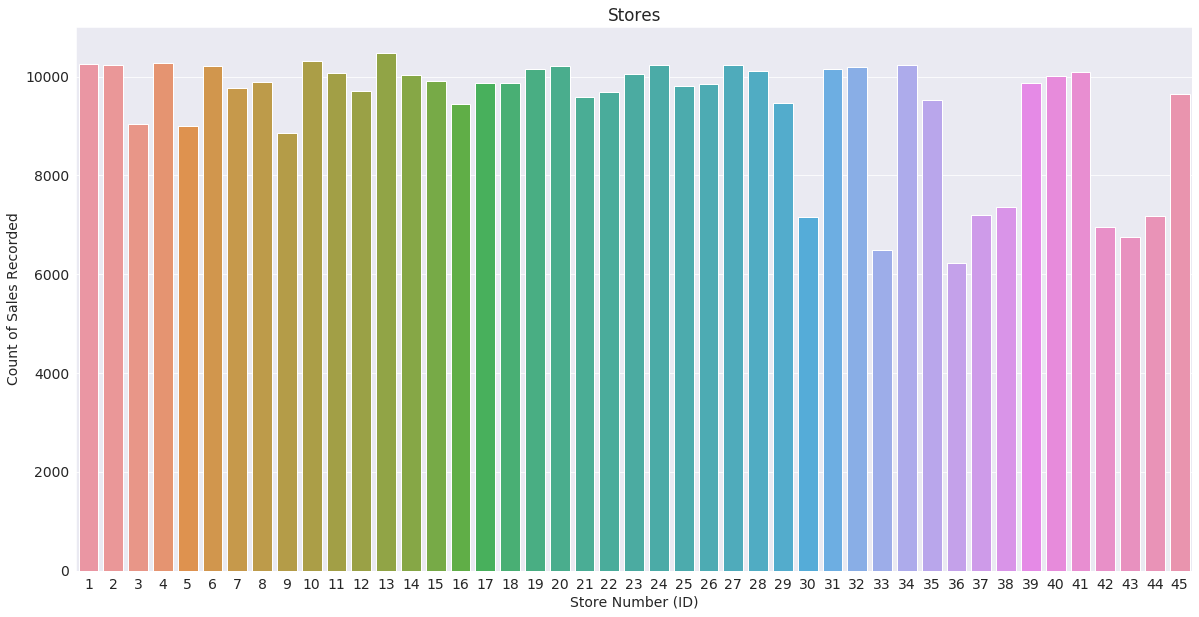

In [89]:
plt.title('Stores')
sns.countplot(x='Store',data=merged_train_df)
plt.xlabel('Store Number (ID)')
plt.ylabel('Count of Sales Recorded');

Most of the Stores (out of 45 Stores) has a sales count of more than 9000 and only some stores have less count of sales records (between 6000 - 7000) that might be because of the less number of departments in their stores or their less popularity.

### Department

In [90]:
merged_train_df["Dept"].describe()[["count", "unique"]].transpose()

count     421570
unique        81
Name: Dept, dtype: int64

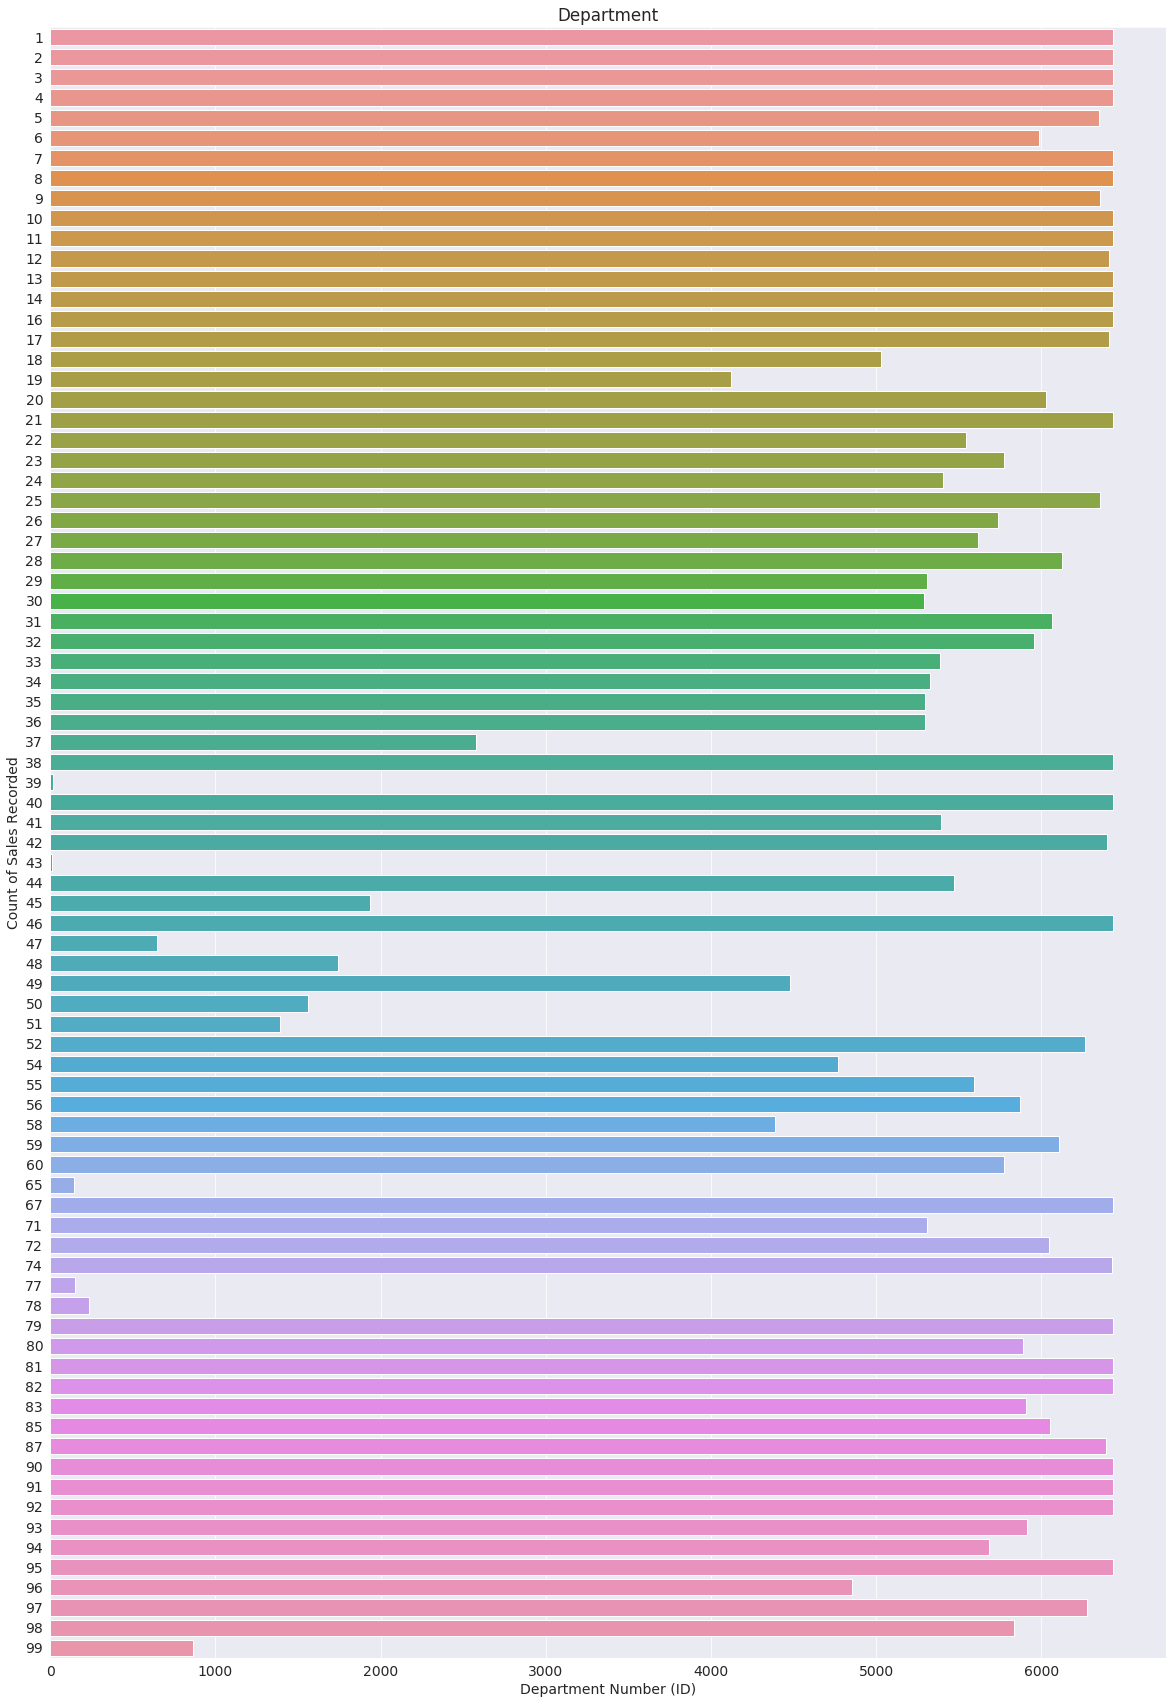

In [91]:
plt.figure(figsize=(20, 30))
plt.title('Department')
sns.countplot(y='Dept',data=merged_train_df);
plt.xlabel('Department Number (ID)')
plt.ylabel('Count of Sales Recorded');

Count of recorded sales were very less in `Departments` such as `39, 43, 65, 77, 78`. It's due to the fact that not all the stores has all the 81 departments.

### Weekly Sales (Target Column)

`Weekly_Sales` column is our target column which we have to predict based on the inputs.

Let's visualize the distribution of `Weekly_Sales` i.e. the department-wise weekly sales of a store. Let's also use the categorical column `IsHoliday` to distinguish the weekly sales for holiday weeks and non-holiday weeks.

In [92]:
merged_train_df["Weekly_Sales"].describe().transpose()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

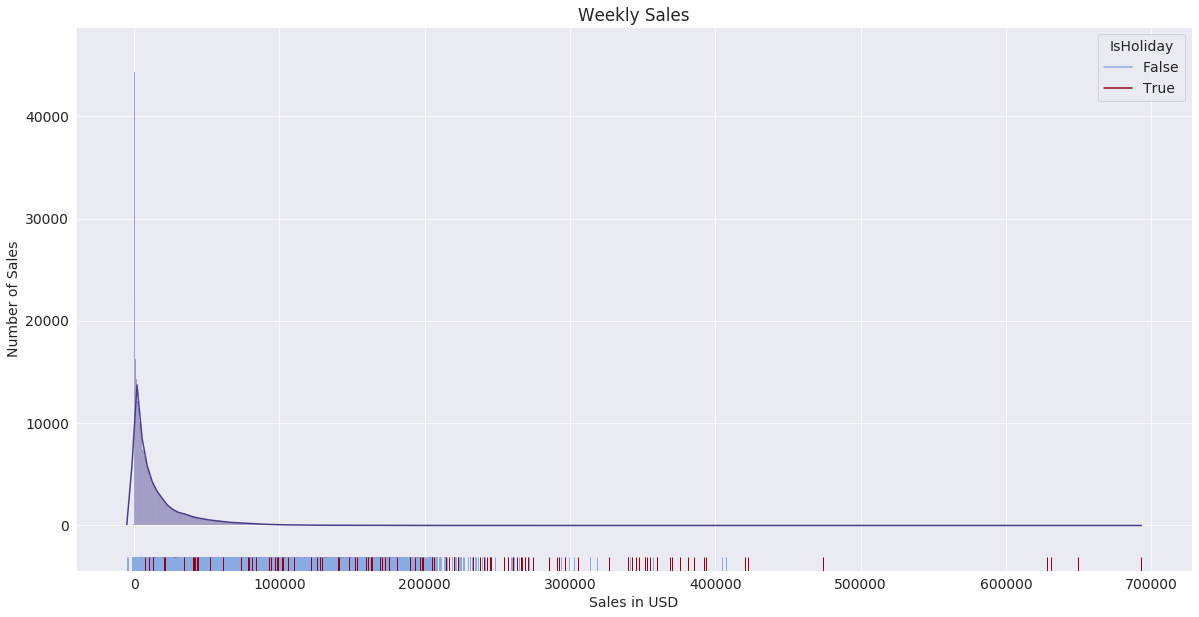

In [93]:
sns.rugplot(x='Weekly_Sales', data=merged_train_df, hue='IsHoliday', palette=['#89ABE3FF', '#990011FF'])
sns.histplot(x='Weekly_Sales', data=merged_train_df, kde=True, color="darkslateblue")

plt.title("Weekly Sales")
plt.xlabel("Sales in USD")
plt.ylabel("Number of Sales");

We can make the following observations from the above graph:

* Most of the weekly sales recorded were below ~\$47,000.
* Weekly sales with value more than \$200,000 is very less.
* Only few sales has values more than ~\$420,000 and those are holiday week sales.

### Holiday Week

In [94]:
print("Total Number of Weeks: {}".format(merged_train_df.Date.nunique()))
print("Holiday Weeks: {}".format(merged_train_df.Date[merged_train_df.IsHoliday == True].nunique()))
print("Non-Holiday Weeks: {}".format(merged_train_df.Date[merged_train_df.IsHoliday == False].nunique()))

Total Number of Weeks: 143
Holiday Weeks: 10
Non-Holiday Weeks: 133


In [95]:
holiday_weeks_counts = merged_train_df.IsHoliday.value_counts()
holiday_weeks_counts

False    391909
True      29661
Name: IsHoliday, dtype: int64

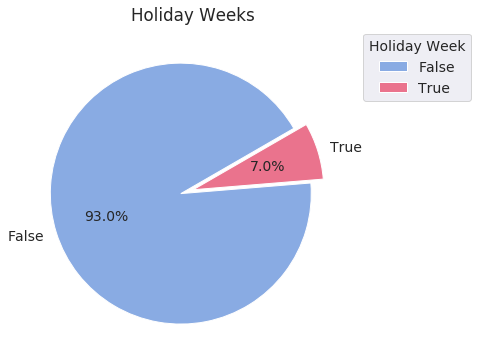

In [96]:
plt.figure(figsize=(12, 6))
plt.pie(holiday_weeks_counts, labels = holiday_weeks_counts.index, autopct ='%.1f%%', startangle = 30, explode = [0.1, 0], colors = ['#89ABE3FF', '#EA738DFF'])
plt.title("Holiday Weeks")
plt.legend(title ='Holiday Week', bbox_to_anchor =(1,1), loc=2);

Out of 143 weeks, only 10 weeks were holiday weeks. And total number of sales recorded during the holiday weeks were 29661 which is merely 7.0% of the total sales recorded.

### Temperature

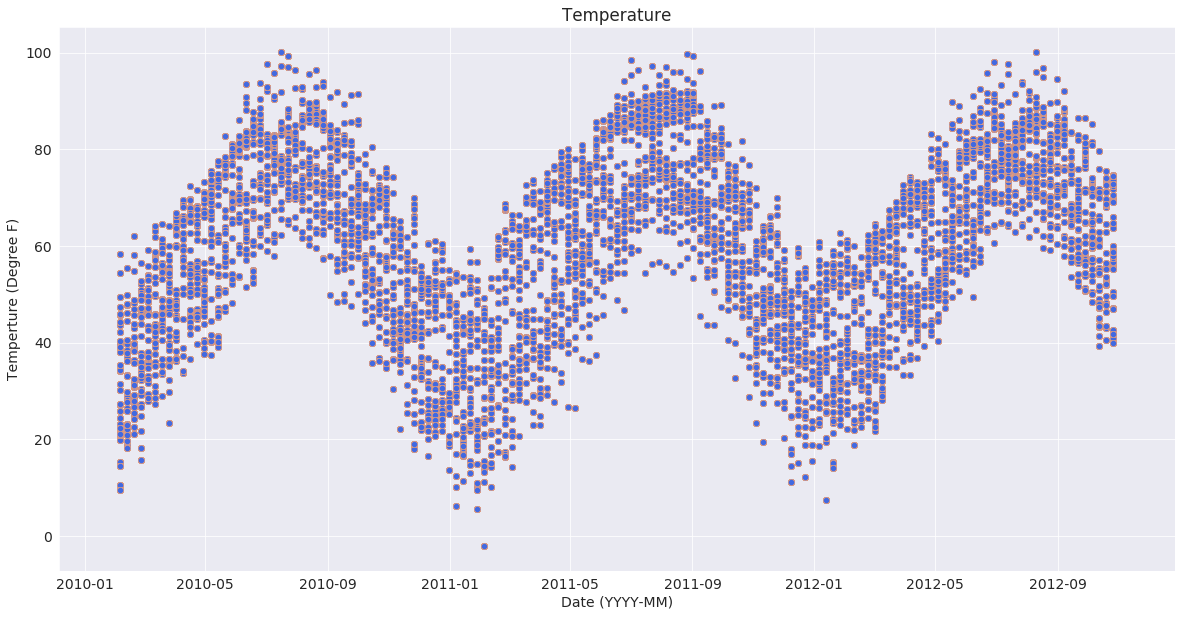

In [97]:
plt.title("Temperature")
sns.scatterplot(x='Date', y='Temperature', data=merged_train_df, edgecolor='#EEA47FFF', color='royalblue')
plt.xlabel("Date (YYYY-MM)")
plt.ylabel("Temperture (Degree F)");

The rise and fall of temperature with respect to the time (date) indicates us the different seasons of the region

### Fuel Price

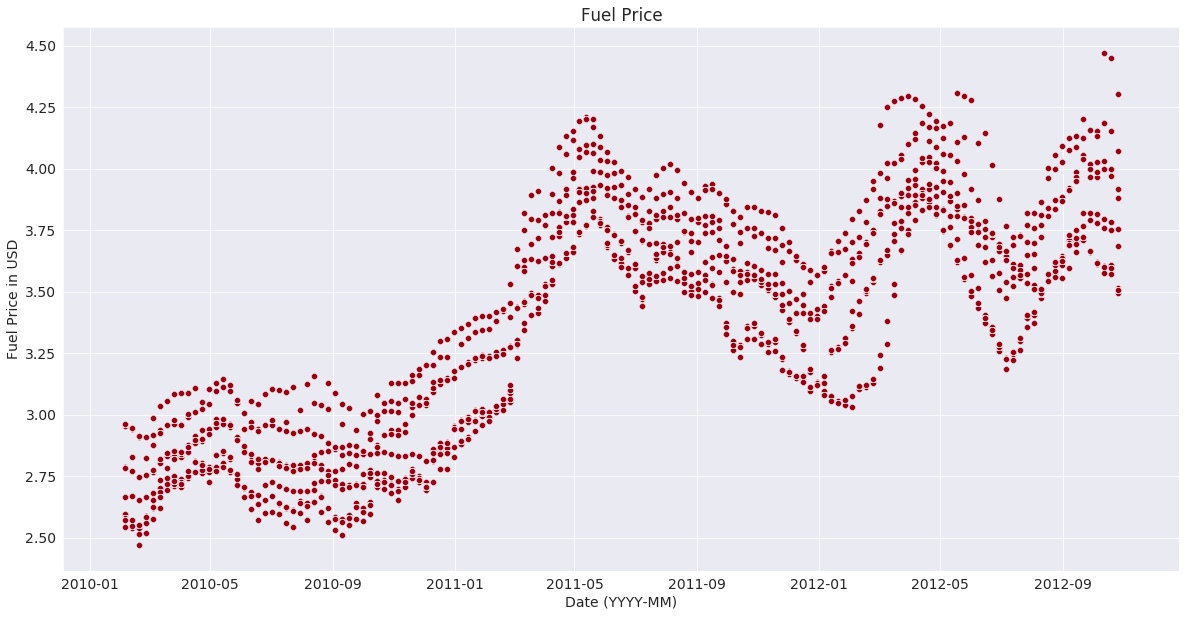

In [98]:
plt.title("Fuel Price")
sns.scatterplot(x='Date', y='Fuel_Price', data=merged_train_df, color='#990011FF');
plt.xlabel("Date (YYYY-MM)")
plt.ylabel("Fuel Price in USD");

Ultimately, the cost of fuel has increased over the time, but the above pattern indicates us there is price differences from state to state in the US.


And these price differences are predominantly due to the distribution costs and state taxes.

### Markdown (1-5)

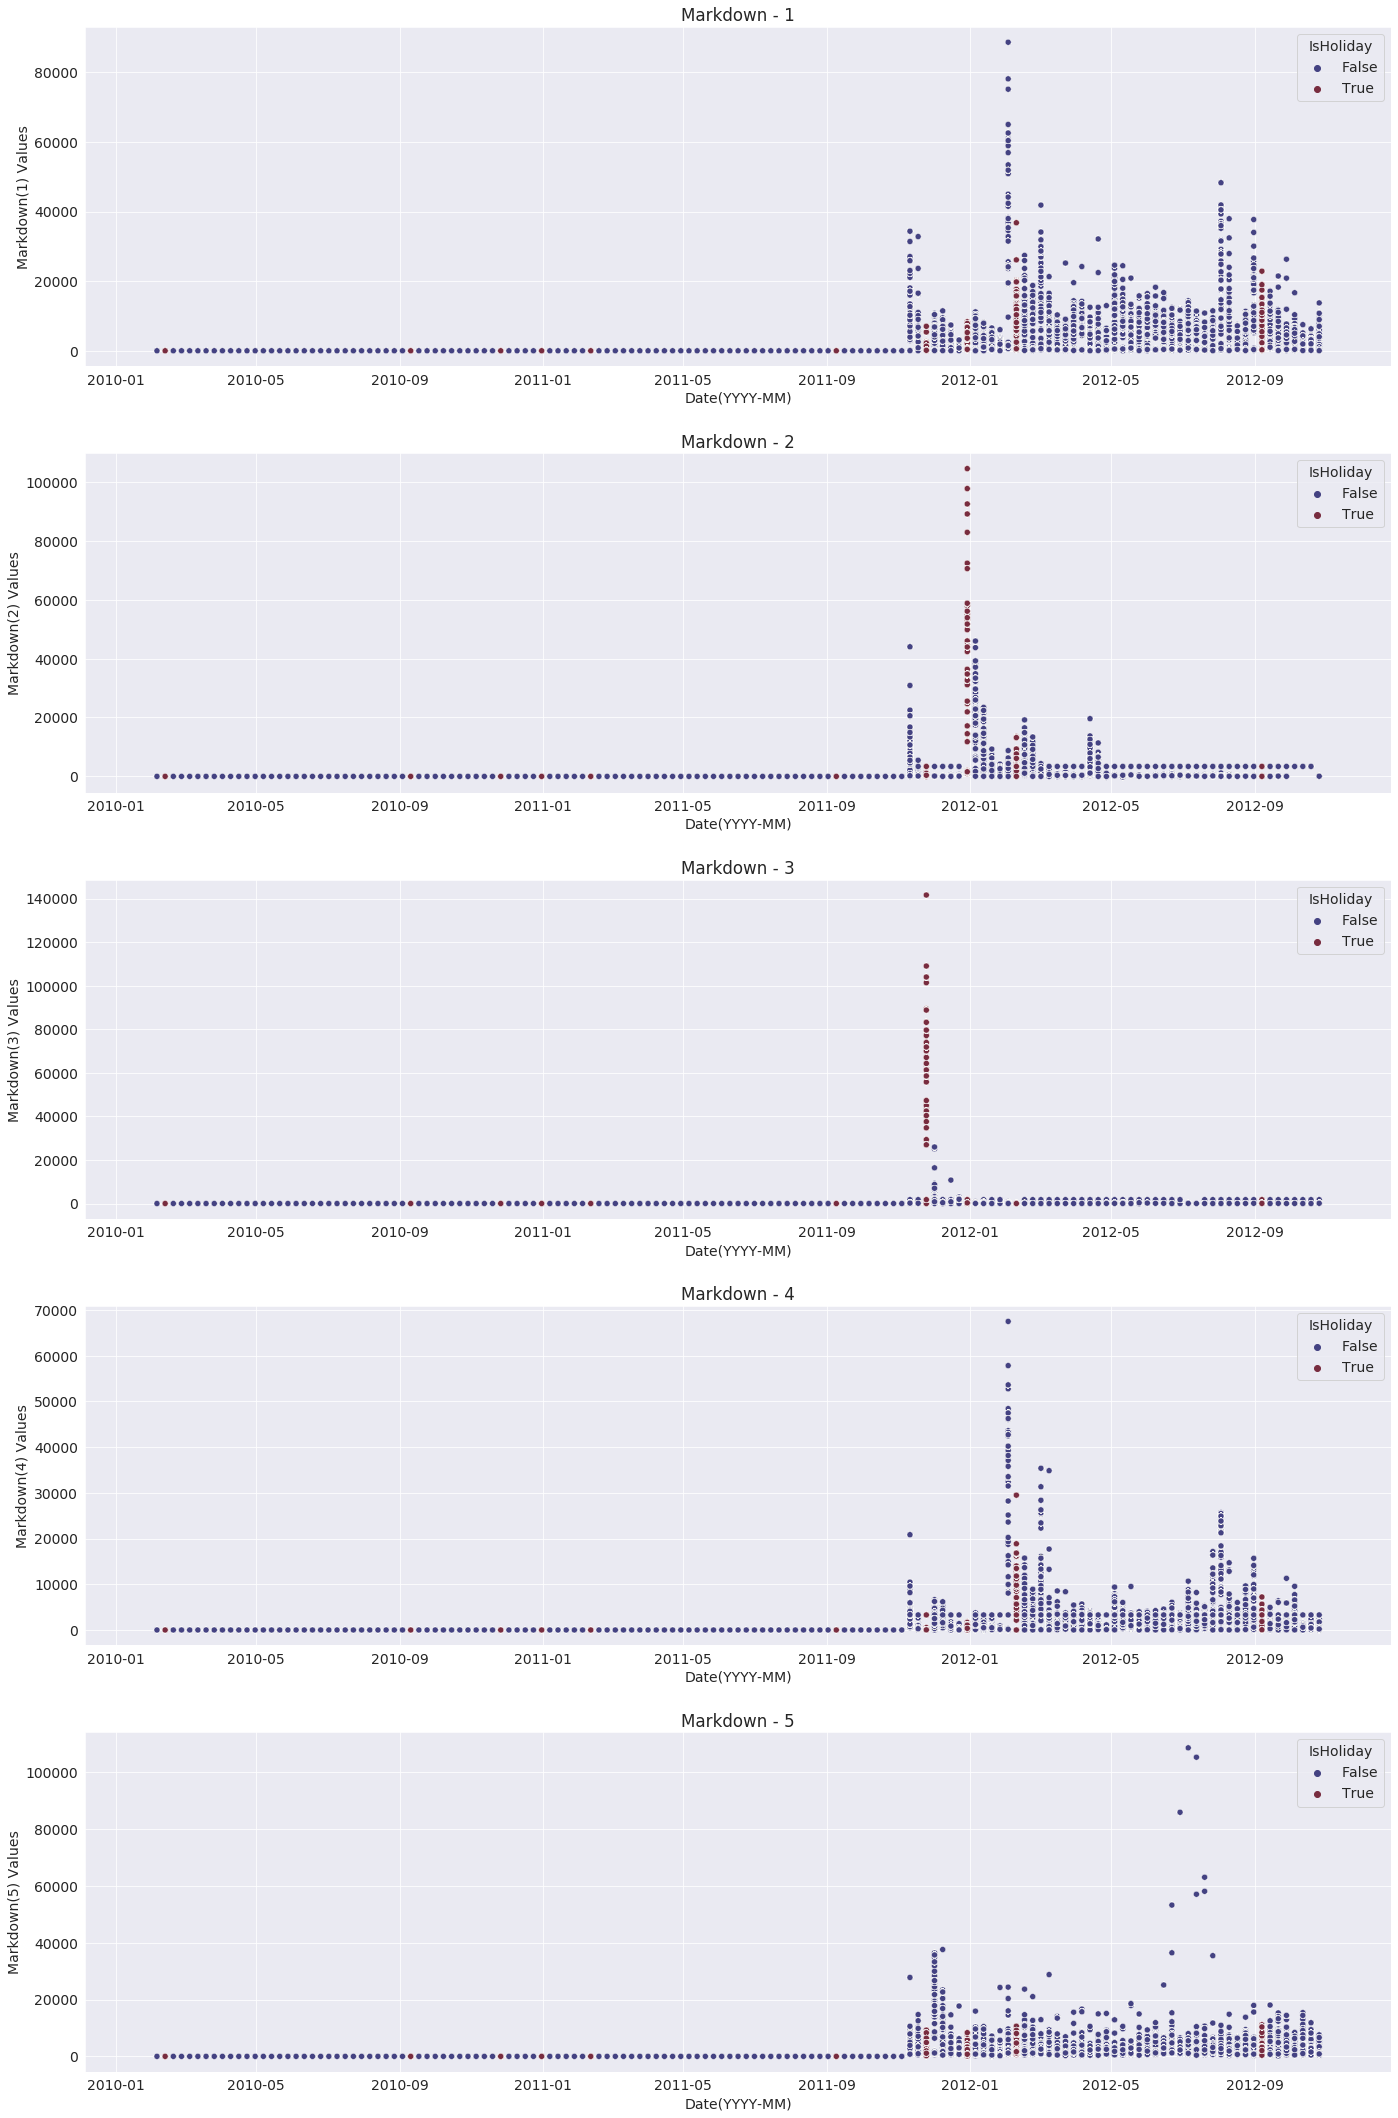

In [99]:
fig, axis = plt.subplots(5,1, figsize=(20, 30))
#axis[0,] for Markdown-1
axis[0,].set_title("Markdown - 1")
sns.scatterplot(x=merged_train_df.Date, y=merged_train_df.MarkDown1, hue=merged_train_df.IsHoliday, ax = axis[0,], palette = 'icefire')
axis[0,].set_ylabel("Markdown(1) Values")
axis[0,].set_xlabel("Date(YYYY-MM)")

#axis[1,] for Markdown-2
axis[1,].set_title("Markdown - 2")
sns.scatterplot(x=merged_train_df.Date, y=merged_train_df.MarkDown2, hue=merged_train_df.IsHoliday, ax = axis[1,], palette = 'icefire')
axis[1,].set_ylabel("Markdown(2) Values")
axis[1,].set_xlabel("Date(YYYY-MM)")

#axis[2,] for Markdown-3
axis[2,].set_title("Markdown - 3")
sns.scatterplot(x=merged_train_df.Date, y=merged_train_df.MarkDown3, hue=merged_train_df.IsHoliday, ax = axis[2,], palette = 'icefire')
axis[2,].set_ylabel("Markdown(3) Values")
axis[2,].set_xlabel("Date(YYYY-MM)")
            
#axis[3,] for Markdown-4
axis[3,].set_title("Markdown - 4")
sns.scatterplot(x=merged_train_df.Date, y=merged_train_df.MarkDown4, hue=merged_train_df.IsHoliday, ax = axis[3,], palette = 'icefire')
axis[3,].set_ylabel("Markdown(4) Values")
axis[3,].set_xlabel("Date(YYYY-MM)")

#axis[4,] for Markdown-5
axis[4,].set_title("Markdown - 5")
sns.scatterplot(x=merged_train_df.Date, y=merged_train_df.MarkDown5, hue=merged_train_df.IsHoliday, ax = axis[4,], palette = 'icefire')
axis[4,].set_ylabel("Markdown(5) Values")
axis[4,].set_xlabel("Date(YYYY-MM)")

plt.tight_layout(pad=2);

From the above graphs, we can conclude that in most cases, the Markdown values has the highest value either during the holiday week or a week before holiday week.

### CPI

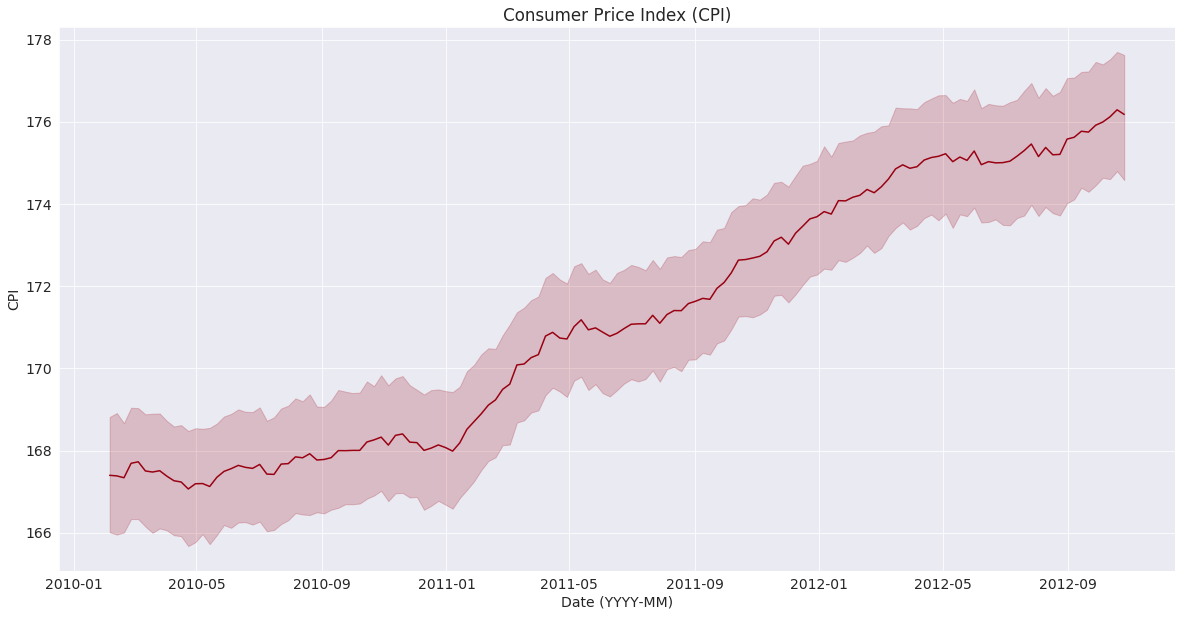

In [100]:
plt.title("Consumer Price Index (CPI)")
sns.lineplot(x='Date', y='CPI', data=merged_train_df, color='#990011FF');
plt.xlabel("Date (YYYY-MM)")
plt.ylabel("CPI");

From the above output, it's clear that the average CPI in the US shows us increasing trend and it resonates well with the real world data. **In reality, the annual average CPI in the USA in 2010 was 218.1 and it's 271.0  in 2021.**

### Unemployment Rate

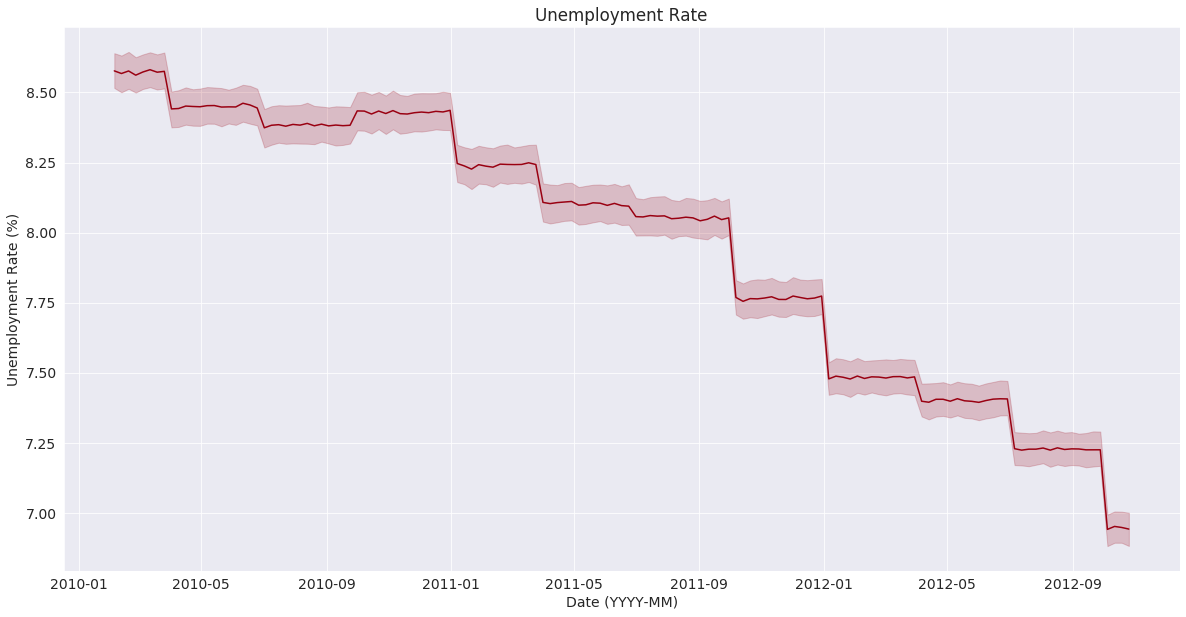

In [101]:
plt.title("Unemployment Rate")
sns.lineplot(x='Date', y='Unemployment', data=merged_train_df, color='#990011FF');
plt.xlabel("Date (YYYY-MM)")
plt.ylabel("Unemployment Rate (%)");

From the above output, it's clear that the rate of unemployment in the US shows us decreasing trend and it resonates well with the real world data. **In reality, the average unemployment rate in the USA in 2010 was 9.3% and it's 3.9%  in 2021.**

### Correlation Matrix

Correlation matrix can help us understand the relationship between different variables in a dataset. The `corr()` function is used to create a correlation matrix from a dataset. And the correlation between variables will be visualized using a Heat Map with the help of `sns.heatmap()` function. 

A correlation value ranging from +1 to -1. Correlation value of `+1` indicates that if one variable increases by 1 unit, then the other variable increases by 1 unit as well. This is called a `Positive Correlation`. 

When the correlation between two variables is `-1`, the value of one variable decreases by 1 unit when the other increases by 1 unit and vice versa. This is referred to as `Negative Correlation`.

In [102]:
correlation_matrix = merged_train_df.corr()

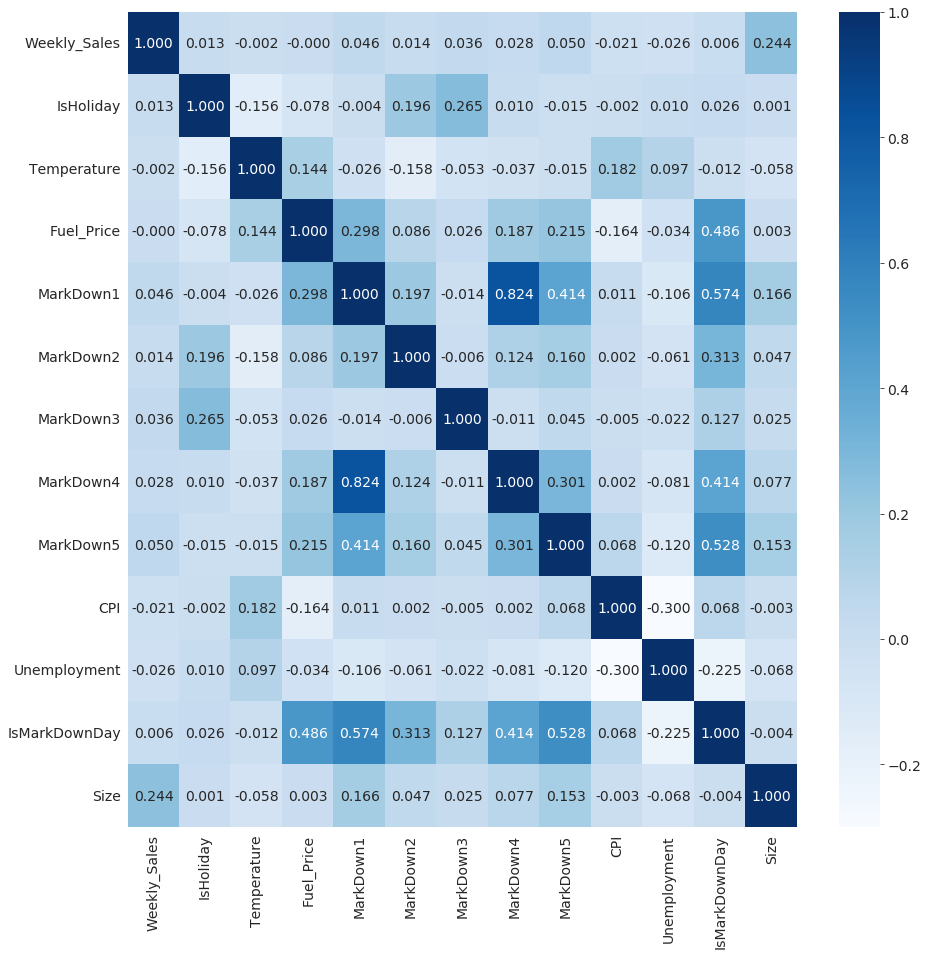

In [103]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, cbar = True, fmt='.3f', annot=True, cmap='Blues');

From the above heat-map, it's clear that `Weekly_Sales` column has negative correlation with `Temperature`, `CPI`, `Fuel_Price`, and `Unemployment`, however that's minimal and a weak correlation.

And `Weekly_Sales` column has a positive correlation with `MarkDown1`, `MarkDown2`, `MarkDown3`, `MarkDown4`, and `MarkDown5`, however that's a weak correlation. So, lets do some feature engineering to find the strong correlation between our target column and input columns.

# Feature Engineering

## Date Feature

### Month of Year

In [104]:
merged_train_df['Year'] = merged_train_df['Date'].dt.year
merged_test_df['Year'] = merged_test_df['Date'].dt.year
merged_train_df['Year']

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
421565    2012
421566    2012
421567    2012
421568    2012
421569    2012
Name: Year, Length: 421570, dtype: int64

In [105]:
merged_train_df['Month'] = merged_train_df['Date'].dt.month
merged_test_df['Month'] = merged_test_df['Date'].dt.month
merged_train_df['Month']

0          2
1          2
2          2
3          2
4          3
          ..
421565     9
421566    10
421567    10
421568    10
421569    10
Name: Month, Length: 421570, dtype: int64

#### Weekly Sales and Month of Year

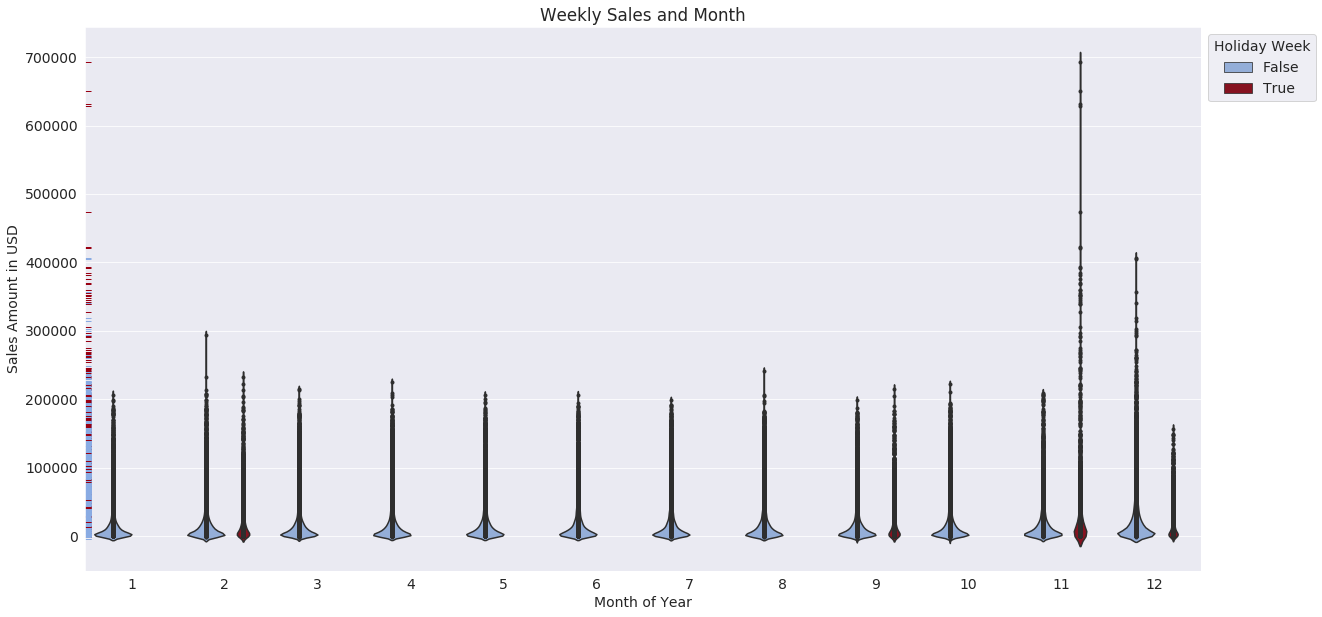

In [106]:
plt.title("Weekly Sales and Month")
sns.rugplot(y='Weekly_Sales',hue='IsHoliday', data=merged_train_df, palette = ['#89ABE3FF', '#990011FF'], height=0.005)

sns.violinplot(x="Month", y='Weekly_Sales',data=merged_train_df, hue="IsHoliday", split=False, inner="points", palette = ['#89ABE3FF', '#990011FF'],
               scale="count")

plt.legend(title ='Holiday Week', bbox_to_anchor =(1,1), loc=2)
plt.xlabel("Month of Year")
plt.ylabel("Sales Amount in USD");

There are only 4 months `(February, September, November and December)` which has holiday weeks in it. The highest sales were recorded during the holiday weeks of `November`.

### Week of Year

In [107]:
merged_train_df['Week'] = merged_train_df['Date'].dt.week
merged_test_df['Week'] = merged_test_df['Date'].dt.week
merged_train_df['Week']

0          5
1          6
2          7
3          8
4          9
          ..
421565    39
421566    40
421567    41
421568    42
421569    43
Name: Week, Length: 421570, dtype: int64

In [108]:
merged_train_df['Week'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

In [109]:
merged_train_df['Week'][merged_train_df['IsHoliday'] == True].sort_values().unique()
print("Holiday Week Numbers are: {}".format(merged_train_df['Week'][merged_train_df['IsHoliday'] == True].sort_values().unique()))

Holiday Week Numbers are: [ 6 36 47 52]


#### Weekly Sales and Week of Year

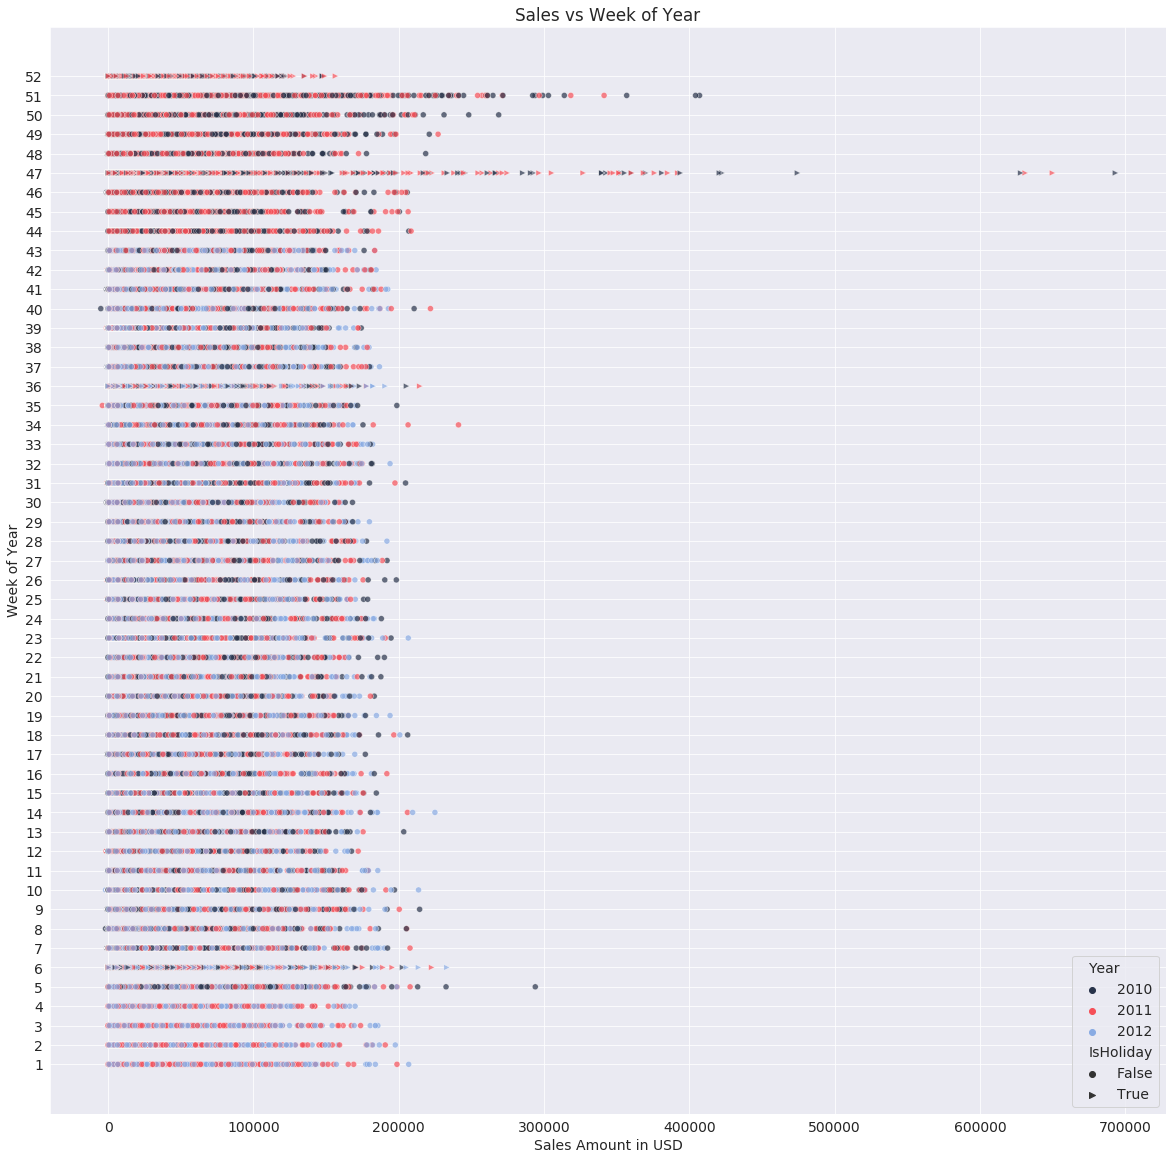

In [110]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='Weekly_Sales', y='Week', hue='Year', style='IsHoliday', markers=["o", ">"], alpha=0.7, data=merged_train_df, palette = ['#28334AFF', '#F65058FF', "#89ABE3FF"])

plt.title("Sales vs Week of Year")
plt.xlabel("Sales Amount in USD")
plt.yticks(range(1,53))
plt.ylabel("Week of Year");

Out of 4 holiday weeks `(6, 36, 47, 52)`, the highest sales were recorded in the week of `47` during the year 2010 and 2011. For 2012, we only have sales record from `January` to `October`. Since our training dataset contains only sales data for the period from 2010-02-05 to 2012-10-26.

### Day of Month

In [111]:
merged_train_df['Day'] = merged_train_df['Date'].dt.day
merged_test_df['Day'] = merged_test_df['Date'].dt.day
merged_train_df['Day']

0          5
1         12
2         19
3         26
4          5
          ..
421565    28
421566     5
421567    12
421568    19
421569    26
Name: Day, Length: 421570, dtype: int64

#### Weekly Sales and Day of Month

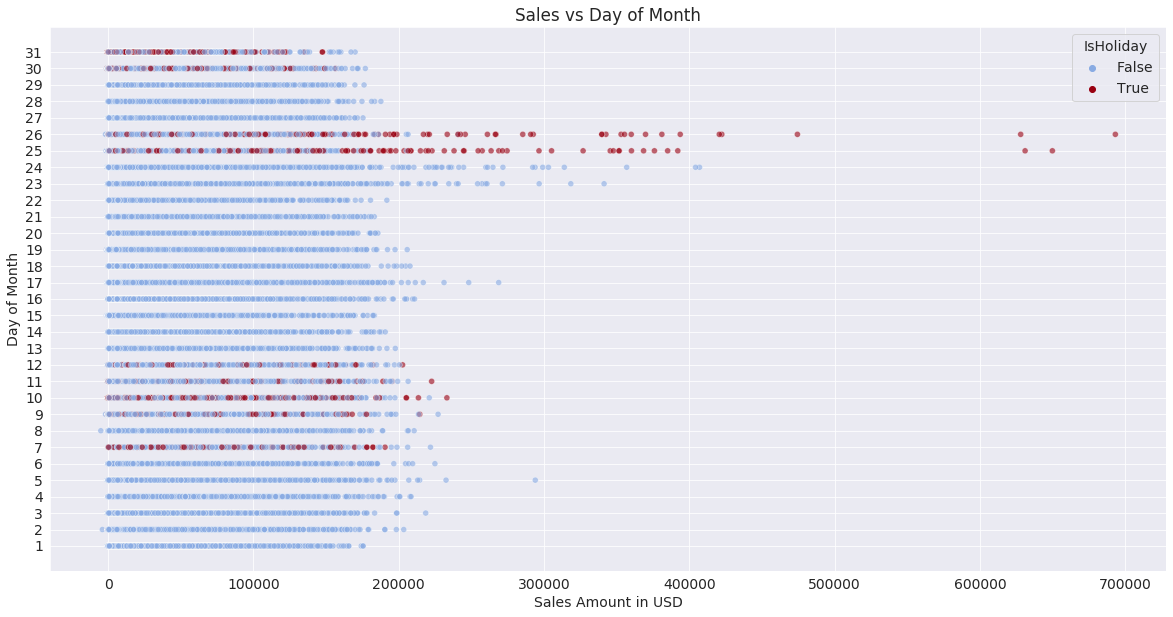

In [112]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Weekly_Sales', y='Day', hue='IsHoliday', data=merged_train_df,
                alpha=0.6, palette = ['#89ABE3FF', '#990011FF'])

plt.title("Sales vs Day of Month")
plt.xlabel("Sales Amount in USD")
plt.yticks(range(1,32))
plt.ylabel("Day of Month");

* Sales amount recorded were higher during the holiday sales.
* Mostly, holidays were occurred in the days of 7, 9, 10, 11, 12, 25, 26, 30, 31.

# Set flags to try features and inputs

In [113]:
all_inputs = True
simple_inputs = False


# Dataset Pre-Processing

## Extract Column Names

### Extract Input and Target columns

In [114]:
merged_train_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsMarkDownDay', 'Type', 'Size',
       'Year', 'Month', 'Week', 'Day'],
      dtype='object')

`Year` column is not included in the list of `input_cols`, since it can't be used to predict the weekly sales of future days.

In [115]:
input_cols = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price',
              'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 
              'CPI', 'Unemployment', 'IsMarkDownDay', 'Type', 'Size', 'Month', 'Day', 'Week']

In [116]:
target_col = 'Weekly_Sales'

### Extract Numeric and Categorical Columns

In [117]:
#converting boolean to numeric values in `IsHoliday` column
merged_train_df['IsHoliday'] = merged_train_df['IsHoliday'] * 1

In [118]:
if all_inputs:
  numeric_cols = ['Temperature', 'Fuel_Price',
                'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 
                'CPI', 'Unemployment']

  boolean_cols = ['IsHoliday', 'IsMarkDownDay'] #column which contains only 0s and 1s and thats categorical

  categorical_cols = ['Store', 'Dept', 'Type', 'Size', 'Month', 'Day', 'Week']

elif simple_inputs:
  numeric_cols = ['Temperature', 'Fuel_Price', 'CPI']

  boolean_cols = ['IsHoliday', 'IsMarkDownDay'] #column which contains only 0s and 1s and thats categorical

  categorical_cols = ['Store', 'Dept', 'Type', 'Size', 'Month', 'Day', 'Week']

## Imputing, Scaling and Encoding

We will perform imputation, scaling and encoding on `merged_train_df` and `merged_test_df`, for easy accessibility and to avoid confusion.

Once preprocessing is completed, we will split datasets into training, validation and test set (`train_df`, `val_df` and `test_df`).

Then `train_inputs`, `val_inputs` and `test_inputs` will be created by copying data from `train_df`, `val_df` and `test_df`.

### Imputing

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

There are several techniques for imputation in `sklearn.impute` module.

In [119]:
#sum of null values in merged training dataset and test dataset
merged_train_df.isna().sum().sum(), merged_test_df.isna().sum().sum()

(0, 0)

From the above output, it's clear that there are no null values in the entire merged training and test dataset.

Since, we have already imputed the `features_df` before merging, to make the process simpler.

### Scaling

#### Scaling - Training Datset

The numeric columns in our merged training dataset have varying ranges.

In [120]:
merged_train_df[numeric_cols].describe().loc[['min', 'max']]

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
min,-2.06,2.472,0.00,-265.76,-29.10,0.00,0.00,126.064000,3.879
max,100.14,4.468,88646.76,104519.54,141630.61,67474.85,108519.28,227.232807,14.313


In [121]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
#create the scaler
scaler = MinMaxScaler()

In [123]:
#fit the scaler to the numeric columns
scaler.fit(merged_train_df[numeric_cols])

MinMaxScaler()

In [124]:
#transform and replace the numeric columns
merged_train_df[numeric_cols] = scaler.transform(merged_train_df[numeric_cols])

After scaling, the ranges of all numeric columns should be $(0, 1)$.

In [125]:
merged_train_df[numeric_cols].describe().loc[['min', 'max']]

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Scaling - Test Datset

In [126]:
merged_test_df[numeric_cols].describe().loc[['min', 'max']]

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
min,-7.29,2.872,-2781.45,-35.74,-179.26,0.22,-185.17,131.236226,3.684
max,101.95,4.125,103184.98,71074.17,149483.31,65344.64,771448.10,233.000000,10.199


In [127]:
#fit the scaler to the numeric columns
scaler.fit(merged_test_df[numeric_cols])

MinMaxScaler()

In [128]:
#transform and replace the numeric columns
merged_test_df[numeric_cols] = scaler.transform(merged_test_df[numeric_cols])

After scaling, the ranges of all numeric columns should be $(0, 1)$.

In [129]:
merged_test_df[numeric_cols].describe().loc[['min', 'max']]

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Encoding

#### Encoding - Training Datset

Our merged training dataset contains several categorical columns, each with a different number of categories.

Let's encode categorical columns.

In [130]:
merged_train_df[categorical_cols].nunique().sort_values(ascending=False)

Dept     81
Week     52
Store    45
Size     40
Day      31
Month    12
Type      3
dtype: int64

In [131]:
from sklearn.preprocessing import OneHotEncoder

In [132]:
#create the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [133]:
#fit the encoder to the categorical colums
encoder.fit(merged_train_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [134]:
#generate column names for each category
encoded_cols = list(encoder.get_feature_names(categorical_cols))
len(encoded_cols)

264

In [135]:
#transform and add new one-hot category columns
merged_train_df[encoded_cols] = encoder.transform(merged_train_df[categorical_cols])


In [136]:
merged_train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Week_43,Week_44,Week_45,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52
0,1,1,2010-02-05,24924.50,0,0.434149,0.050100,0.000000,0.002536,0.000205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2010-02-12,46039.49,1,0.396967,0.038076,0.000000,0.002536,0.000205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,2010-02-19,41595.55,0,0.410861,0.021042,0.000000,0.002536,0.000205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,2010-02-26,19403.54,0,0.476419,0.044589,0.000000,0.002536,0.000205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,2010-03-05,21827.90,0,0.475147,0.076653,0.000000,0.002536,0.000205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,0.654990,0.764028,0.051402,0.002733,0.000216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421566,45,98,2012-10-05,628.10,0,0.655088,0.758016,0.056931,0.034833,0.000338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421567,45,98,2012-10-12,1061.02,0,0.553131,0.765531,0.022068,0.034833,0.000261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421568,45,98,2012-10-19,760.01,0,0.572701,0.750000,0.022607,0.034833,0.000228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Encoding - Test Datset

In [137]:
merged_test_df[categorical_cols].nunique().sort_values(ascending=False)

Dept     81
Store    45
Size     40
Week     39
Day      27
Month     9
Type      3
dtype: int64

In [138]:
#create the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [139]:
#fit the encoder to the categorical colums
encoder.fit(merged_test_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [140]:
#generate column names for each category
encoded_cols = list(encoder.get_feature_names(categorical_cols))
len(encoded_cols)

244

In [141]:
#transform and add new one-hot category columns
merged_test_df[encoded_cols] = encoder.transform(merged_test_df[categorical_cols])


In [142]:
merged_test_df

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Week_30,Week_44,Week_45,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52
0,1,1,2012-11-02,False,0.573142,0.410215,0.090103,0.072893,0.001537,0.055700,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2012-11-09,False,0.627334,0.352753,0.134031,0.047907,0.001467,0.071109,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,2012-11-16,False,0.551172,0.303272,0.117752,0.004610,0.001891,0.017338,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,2012-11-23,True,0.581472,0.270551,0.034587,0.000561,0.501726,0.003209,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,1,2012-11-30,False,0.545862,0.267358,0.049464,0.048093,0.026844,0.002301,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,0.762907,0.612131,0.071945,0.014214,0.001218,0.037490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115060,45,98,2013-07-05,False,0.776181,0.592179,0.112035,0.032405,0.005091,0.088718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115061,45,98,2013-07-12,False,0.793299,0.592179,0.062014,0.026200,0.001771,0.011395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115062,45,98,2013-07-19,False,0.825064,0.690343,0.054196,0.015227,0.002562,0.005552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split into training and validation sets

In general, we can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, we can use a 75%-25% training-validation split.

Since, this dataset is time-series, we will split this training dataset for the purpose of validation (test set is provided separately) based on the dates instead of using `train_test_split` function from `sklearn.model_selection` i.e. used for splitting dataset randomly.

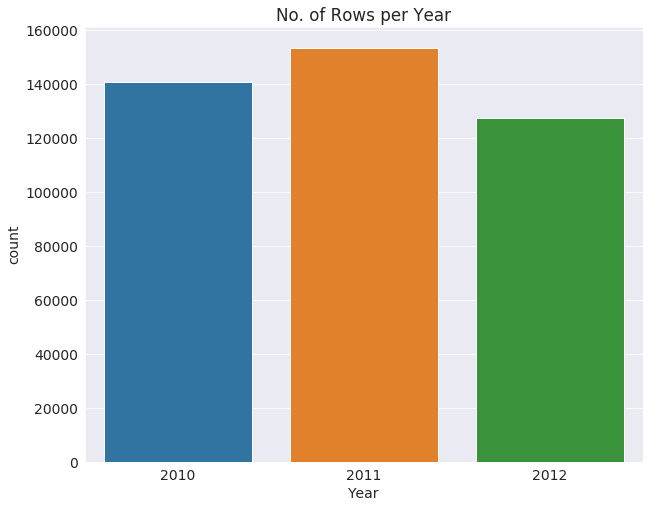

In [143]:
plt.figure(figsize=(10,8))
plt.title('No. of Rows per Year')
sns.countplot(x='Year', data=merged_train_df);

We have to use the future data to validate our model which is trained based on the past data. If we take the data only from the year 2012, it's missing data for the month of November and December. So, let's take the data from Nov-2011 to Oct-2012 for our validation set.

In [144]:
#it is just a view of merged_train_df and merged_test_df
train_df = merged_train_df[merged_train_df.Date < '2011-11-01']
val_df = merged_train_df[merged_train_df.Date >= '2011-11-01']
test_df = merged_test_df

In [145]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)

train_df.shape : (267184, 285)
val_df.shape : (154386, 285)


In [146]:
#percentage of data for training set from merged_train_df
train_df.shape[0]/merged_train_df.shape[0]*100

63.378323884526885

In [147]:
val_df.Month.nunique()

12

While it's not a perfect 75-25 split, we have ensured that the test validation and test sets both contain data for all 12 months of the year.

## Input and Target Dataframe for Train, Validation and Test Set

Preprocessing is completed successfully, now `train_inputs`, `val_inputs` and `test_inputs` will be created by copying data from `train_df`, `val_df` and `test_df`.

In [148]:
train_inputs = train_df[numeric_cols + boolean_cols + encoded_cols].copy()
train_targets = train_df[target_col].copy()

In [149]:
val_inputs = val_df[numeric_cols + boolean_cols + encoded_cols].copy()
val_targets = val_df[target_col].copy()

In [150]:
test_inputs = test_df[numeric_cols + boolean_cols + encoded_cols].copy()

# Loss Function (Evaluation Metrics)



## Weighted Mean Absolute Error (WMAE)

This competition is evaluated based on the Weighted Mean Absolute Error (WMAE):

$$ \textrm{WMAE} = \frac{1}{\sum{w_i}} \sum_{i=1}^n w_i | y_i - \hat{y}_i | $$

where
* $n$ is the number of rows.
* $\hat{y}_i$ is the predicted sales.
* $y_i$ is the actual sales.
* $w_i$ are weights. $w$ = $5$ if the week is a holiday week, $1$ otherwise.

Note: This above formula is obtained from the kaggle competition page.

In [151]:
def wmae(df, targets, preds):
  numerator = 0
  denominator = 0
  wmae = 0
  for value in df['IsHoliday']:
    if value == 1:
      weights = 5
    elif value == 0:
      weights = 1
    numerator += abs(targets - preds) * weights
    denominator += weights
  wmae = numerator / denominator
  return wmae

## Root Mean Squared Error (RMSE)

The root mean square error is an important metric for determining how well a model fits a dataset. The larger the RMSE, the bigger the difference between the predicted and observed values, which means the worse the model fits. In contrast, the smaller the RMSE, the better a model fits the data. Below is a mathematical expression to describe the RMSE: 

$$RMSE = \sqrt{\frac{\Sigma_{i=1}^{n}{(y_i - \hat{y}_i})^2}{n}}$$

where
* $n$ is the number of rows.
* $\hat{y}_i$ is the predicted sales.
* $y_i$ is the actual sales.



Let's define a helper function to compute the RMSE.


In [152]:
from sklearn.metrics import mean_squared_error

In [153]:
def rmse(targets, preds):
    ''' rmse() is a helper function used to determine the root mean squared error.
        It accepts only 2 arguments:
        targets : actual output value
        preds   : predicted output value 
    ''' 
    rmse = mean_squared_error(targets, preds, squared = False)
    return rmse

## Function to Evaluate Models

Let's define a helper function to evaluate models and generate predictions.

In [154]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = rmse(train_targets, train_preds)
    val_preds = model.predict(val_inputs)
    val_rmse = rmse(val_targets, val_preds)
    print("Train RMSE: {}\nValidation RMSE: {}".format(train_rmse, val_rmse))
    #return train_rmse, val_rmse, train_preds, val_preds

# Baseline Model

A baseline is a method that uses heuristics, simple summary statistics, randomness, or machine learning to create predictions for a dataset. We can use these predictions to measure the baseline's performance (e.g. accuracy) - this metric will then become what you compare any other machine learning algorithm against.

In [155]:
#baseline model to return a list of median value of target column
def fill_median(inputs):
    return np.full(len(inputs), merged_train_df.Weekly_Sales.median())

In [156]:
#baseline model to return a list of mean value of target column
def fill_mean(inputs):
    return np.full(len(inputs), merged_train_df.Weekly_Sales.mean())

In [157]:
median_model_preds = fill_median(train_inputs)
mean_model_preds = fill_mean(train_inputs)

In [158]:
rmse(train_targets, median_model_preds)

23875.46269916441

In [159]:
rmse(train_targets, mean_model_preds)

22404.051107693056

In [160]:
%%time
#wmae(train_inputs, train_targets, median_model_preds)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10 µs


# Model Training and Selection

In this section, we will train different models and select the best models for processing further and hyperparameter tuning to get the best possible result.

## Vanilla Models - Training

Vanilla Model means standard, usual, plain or unmodified version of any Machine Learning Model.

### Linear Regression

Let's train our simple linear regression model with the training data by importing `LinearRegression` class from `linear_model` library in scikit-learn. 

In [161]:
#import LinearRegression class from linear_model in scikit-learn 
from sklearn.linear_model import LinearRegression 

In [162]:
#create the model
line_model = LinearRegression()

In [163]:
#train our model using train_inputs and train_targets by using fit method
line_model.fit(train_inputs, train_targets)

LinearRegression()

In [164]:
%%time
line_model.predict(val_inputs)

CPU times: user 280 ms, sys: 73.5 ms, total: 354 ms
Wall time: 244 ms


array([ 2.54040000e+04,  1.20442089e+15, -9.68420724e+14, ...,
        5.51783010e+14,  4.42987786e+14, -9.68380191e+14])

In [165]:
print("Linear Model Result:")
evaluate(line_model)

Linear Model Result:
Train RMSE: 13003.740114180218
Validation RMSE: 3751801989234849.5


### Ridge Regression

Let's train our simple ridge regression model with the training data by importing `Ridge` class from `linear_model` library in scikit-learn. 

In [166]:
#import Ridge class from linear_model in scikit-learn 
from sklearn.linear_model import Ridge 

In [167]:
#create the model
ridge_model = Ridge(random_state = 42)

In [168]:
#train our model using train_inputs and train_targets by using fit method
%%time
ridge_model.fit(train_inputs, train_targets)

CPU times: user 2.12 s, sys: 203 ms, total: 2.32 s
Wall time: 1.48 s


Ridge(random_state=42)

In [169]:
ridge_model.predict(val_inputs)

array([25223.61555784, 25688.4838951 , 25569.5274826 , ...,
        2316.58017151,  2404.56426833,  2590.9653972 ])

In [170]:
evaluate(ridge_model)

Train RMSE: 13003.560739566678
Validation RMSE: 13542.024159716573


### Decision Tree

Let's train our simple decision tree model with the training data by importing `DecisionTreeRegressor` class from `tree` library in scikit-learn. 

In [171]:
from sklearn.tree import DecisionTreeRegressor

In [172]:
#create the model
tree_model = DecisionTreeRegressor(random_state = 42)

In [173]:
#train our model using train_inputs and train_targets by using fit method
%%time
tree_model.fit(train_inputs, train_targets)

CPU times: user 22.6 s, sys: 51.6 ms, total: 22.7 s
Wall time: 22.5 s


DecisionTreeRegressor(random_state=42)

In [174]:
tree_model.predict(val_inputs)

array([34238.88, 19549.39, 19549.39, ...,  1167.9 ,  1167.9 ,  1167.9 ])

In [175]:
evaluate(tree_model)

Train RMSE: 2.9090042075503995e-16
Validation RMSE: 7559.3223656044165


### Random Forest

Let's train our simple random forest model with the training data by importing `RandomForestRegressor` class from `ensemble` library in scikit-learn. 

In [176]:
from sklearn.ensemble import RandomForestRegressor

In [177]:
#create the model
forest_model = RandomForestRegressor(n_jobs=-1, random_state = 42, n_estimators=20, max_depth=4)

In [178]:
#train our model using train_inputs and train_targets by using fit method
forest_model.fit(train_inputs, train_targets)

RandomForestRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=42)

In [179]:
%%time
forest_model.predict(val_inputs)

CPU times: user 299 ms, sys: 0 ns, total: 299 ms
Wall time: 304 ms


array([12825.46179737, 12825.46179737, 12825.46179737, ...,
       12825.46179737, 12825.46179737, 12825.46179737])

In [180]:
evaluate(forest_model)

Train RMSE: 17636.70897407544
Validation RMSE: 18399.325448572556


### Gradient Boosting

Let's train our simple gradient boosting model with the training data by importing `XGBRegressor` class from `xgboost` library. 

In [181]:
from xgboost import XGBRegressor

In [182]:
#create the model
xgb_model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [183]:
#train our model using train_inputs and train_targets by using fit method
%%time
xgb_model.fit(train_inputs, train_targets)

[12:15:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 1min 7s, sys: 1.48 s, total: 1min 8s
Wall time: 36.7 s


XGBRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=42)

In [184]:
xgb_model.predict(val_inputs)

array([12147.456, 12147.456, 12147.456, ...,  8710.005,  8710.005,
        8710.005], dtype=float32)

In [185]:
evaluate(xgb_model)

Train RMSE: 15759.075845978172
Validation RMSE: 16594.330940830117


### Conclusion from Model Selection

Linear Model performed the worst when compared to Ridge, Decision Tree, Random Forest and Gradient Boosting models.

So, let's use only Ridge, Decision Tree, Random Forest and Gradient Boosting for tuning hyperparameter.



# Hyperparameter Tuning

## Ridge Regression

In [186]:
#create the model
ridge_model1 = Ridge(random_state=42, alpha=1, fit_intercept=True, max_iter=100000, solver='saga')

In [187]:
#train our model using train_inputs and train_targets by using fit method
%%time
ridge_model1.fit(train_inputs, train_targets)

CPU times: user 23.7 s, sys: 240 ms, total: 23.9 s
Wall time: 23.7 s


Ridge(alpha=1, max_iter=100000, random_state=42, solver='saga')

In [188]:
ridge_model1.predict(val_inputs)

array([25211.79279452, 25672.93387638, 25553.10189763, ...,
        2299.00566886,  2386.69219047,  2570.95317154])

In [189]:
evaluate(ridge_model1)

Train RMSE: 13003.56485477241
Validation RMSE: 13541.805808564708


In [190]:
evaluate(ridge_model)

Train RMSE: 13003.560739566678
Validation RMSE: 13542.024159716573


## Decision Tree

In [191]:
#create the model
tree_model1 = DecisionTreeRegressor(random_state = 42, max_depth=7, 
                                    min_samples_leaf=4, max_features=0.4)

In [192]:
#train our model using train_inputs and train_targets by using fit method
%%time
tree_model1.fit(train_inputs, train_targets)

CPU times: user 1.86 s, sys: 82.5 ms, total: 1.94 s
Wall time: 1.86 s


DecisionTreeRegressor(max_depth=7, max_features=0.4, min_samples_leaf=4,
                      random_state=42)

In [193]:
tree_model1.predict(val_inputs)

array([11441.65081533, 11441.65081533, 11441.65081533, ...,
       11441.65081533, 11441.65081533, 11441.65081533])

In [194]:
evaluate(tree_model1)

Train RMSE: 16057.408122824845
Validation RMSE: 16799.569629184043


In [195]:
evaluate(tree_model)

Train RMSE: 2.9090042075503995e-16
Validation RMSE: 7559.3223656044165


## Random Forest

In [196]:
#create the model
forest_model1 = RandomForestRegressor(n_jobs=-1, random_state = 42, n_estimators=300, max_depth=9,
                                      min_samples_leaf=4, max_features=0.4)

In [197]:
#train our model using train_inputs and train_targets by using fit method
%%time
forest_model1.fit(train_inputs, train_targets)

CPU times: user 10min 57s, sys: 105 ms, total: 10min 57s
Wall time: 5min 39s


RandomForestRegressor(max_depth=9, max_features=0.4, min_samples_leaf=4,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [198]:
forest_model1.predict(val_inputs)

array([12545.85653868, 12545.85653868, 12545.85653868, ...,
        8698.66385204,  8698.66385204,  8698.66385204])

In [199]:
evaluate(forest_model1)

Train RMSE: 12986.157098595006
Validation RMSE: 13760.642788521503


In [200]:
evaluate(forest_model)

Train RMSE: 17636.70897407544
Validation RMSE: 18399.325448572556


## Gradient Boosting

In [201]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(train_inputs, train_targets)
    train_rmse = rmse(model.predict(train_inputs), train_targets)
    val_rmse = rmse(model.predict(val_inputs), val_targets)
    print('Train RMSE: {},\nValidation RMSE: {}'.format(train_rmse, val_rmse))

#### `n_estimators`

The number of trees to be created.

More trees = greater capacity of the model.

In [202]:
test_params(n_estimators=10)

[12:22:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 19358.654176903932,
Validation RMSE: 20210.914276599033


In [203]:
test_params(n_estimators=30)

[12:22:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 15685.536136968702,
Validation RMSE: 16430.65463266182


In [204]:
test_params(n_estimators=100)

[12:23:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 12370.46549720937,
Validation RMSE: 13034.03692407822


In [205]:
test_params(n_estimators=240)

[12:25:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 10122.621293182676,
Validation RMSE: 10847.890089233853


In [206]:
test_params(n_estimators=300)

[12:30:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 9607.579191304681,
Validation RMSE: 10321.469538877885


**select (n_estimators=300)**

#### `max_depth`

As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.

In [207]:
test_params(max_depth=2)

[12:37:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 14203.91960471694,
Validation RMSE: 14872.831811693513


In [208]:
test_params(max_depth=5)

[12:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 9901.70529612715,
Validation RMSE: 10904.842695602714


In [209]:
test_params(max_depth=10)

[12:41:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 6049.402088936551,
Validation RMSE: 7831.867499645327


**select (max_depth=10)**

#### `learning_rate`

The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [210]:
test_params(n_estimators=50, learning_rate=0.01)

[12:48:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 22121.160593342196,
Validation RMSE: 22988.261865303935


In [211]:
test_params(n_estimators=50, learning_rate=0.1)

[12:49:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 14285.054152756258,
Validation RMSE: 15025.8739486569


In [212]:
test_params(n_estimators=50, learning_rate=0.3)

[12:50:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 11050.584938207163,
Validation RMSE: 11768.243561180367


In [213]:
test_params(n_estimators=50, learning_rate=0.9)

[12:51:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 9178.455519462115,
Validation RMSE: 10079.965058318474


In [214]:
test_params(n_estimators=50, learning_rate=1.0)

[12:52:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 8625.926594854034,
Validation RMSE: 9621.045915075243


**select (learning_rate=0.5)**

### Tuned - XGB Model

In [215]:
#create the model
xgb_model1 = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=300, 
                          learning_rate=0.5, max_depth=10, subsample=0.9, colsample_bytree=0.9)

In [216]:
%%time
xgb_model1.fit(train_inputs, train_targets)

[12:54:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 39min 4s, sys: 2.47 s, total: 39min 6s
Wall time: 20min 2s


XGBRegressor(colsample_bytree=0.9, learning_rate=0.5, max_depth=10,
             n_estimators=300, n_jobs=-1, random_state=42, subsample=0.9)

In [217]:
evaluate(xgb_model1)

Train RMSE: 1218.699855346571
Validation RMSE: 5657.840125129946


In [218]:
evaluate(xgb_model)

Train RMSE: 15759.075845978172
Validation RMSE: 16594.330940830117


# Making Predictions

Let's make prediction using our tuned xgb model.

In [219]:
test_preds = xgb_model1.predict(test_inputs)

Let's add the predictions into `submission_df`.

In [220]:
submission_df['Weekly_Sales']  = test_preds

In [221]:
submission_df

,Id,Weekly_Sales
0,1_1_2012-11-02,33660.738281
1,1_1_2012-11-09,16671.208984
2,1_1_2012-11-16,17373.173828
3,1_1_2012-11-23,17504.423828
4,1_1_2012-11-30,13126.886719
...,...,...
115059,45_98_2013-06-28,581.418030
115060,45_98_2013-07-05,572.326294
115061,45_98_2013-07-12,456.841003
115062,45_98_2013-07-19,654.294006


We can now save the predictions as a CSV file.

In [222]:
submission_df.to_csv('submission.csv', index=None)

In [223]:
from IPython.display import FileLink

In [224]:
# Doesn't work on Colab, use the file browser instead
FileLink('submission.csv')

/content/submission.csv

In [225]:
#to download file in colab
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We can now make a submission on this page and check our score: https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/submit

## Save and Load Trained Models


We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the `joblib` module to save and load Python objects on the disk. 

In [226]:
#to save and load Python objects on the disk
import joblib

Let's first create a dictionary containing all the required objects.

In [227]:
walmart_sales = {
    'model': xgb_model1,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

We can now save this to a file using `joblib.dump`

In [228]:
joblib.dump(walmart_sales, 'walmart_sales.joblib')

['walmart_sales.joblib']

The object can be loaded back using `joblib.load`

In [229]:
walmart_sales1 = joblib.load('walmart_sales.joblib')

[13:14:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Let's use the loaded model to make predictions on the original test set.

In [230]:
test_preds2 = walmart_sales1['model'].predict(test_inputs)

In [235]:
check_list_elements(test_preds2, test_preds)

'Yes, List1 contains all elements in List2'

As expected, we get the same result as the original model. 

Let's save our work before continuing. We can upload our trained models to Jovian using the `outputs` argument.

In [232]:
# Doesn't work on Colab
#jovian.commit(outputs=['walmart_sales.joblib'])

In [233]:
#to download file in colab
files.download('walmart_sales.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Summary & Insights

We've drawn many inferences from the survey. Here's a summary of a few of them:

* There are 45 stores with unique ID ranges from 1 to 45 and 81 Departments with unique ID ranges from 1 to 99 which means that they are using only 81 numbers among (1 - 99), which might be because they have removed or merged departments during their organizational change. And the removed (18) department ID's are: 15, 53, 57, 61, 62, 63, 64, 66, 68, 69, 70, 73, 75, 76, 84, 86, 88, 89.
* There are 143 unique date values, ranges from 2010-02-05 to 2012-10-26. 143 date values represents the date of each week when sales were recorded which is `Friday`. There are 142 weeks between 2010-02-05 to 2012-10-26 which means no week has been missed.

**`Note: Sales will be recorded at the end of the week, so including that one week before the initial date (2010-02-05) will provide us the total of 143 weeks.`**

* There are no null values in our target column `Weekly_Sales`, and the amount ranges from -4988.94 USD to +693099.36 USD with an average of 15981.26 USD.
* There were a total of 29,661 sales (out of 421,570) recorded during the holiday week which should be weighed five times higher in the evaluation than non-holiday weeks.
* The value of temperature ranges from -2.06 to 100.14 degrees F (Fahrenheit) with an average temperature of ~ 60 degrees F (Fahrenheit). In real-world, the average annual temperature recorded in the USA during the year 2010, 2011, 2012 were 53.8, 53.8 and 55.3 degrees F respectively. And the discrepancy between our dataset and real-world is due to the fact that this temperature recorded in our dataset corresponds only to the region where Walmart has stores which not entirely covers the complete area of the USA. 
* The value of fuel price ranges from 2.472 USD to 4.468 USD with an average value of ~3.36 USD. In real-world, the average value of fuel price during 2010 - 2012 was ~3.32 USD. 
* The average value of CPI is ~171.21 with minimum and maximum value of 126.064 and 227.24 respectively. In real world, the average value is 224.17. As said earlier, this discrepancy might be due to the coverage of the entire area.
* The average value of Unemployment rate is ~8% with minimum and maximum value of 3.879 and 14.313 respectively. In real world, the average value is ~8.86%.
* There are 3 types of stores namely A, B, and C and it's not categorized based on their area. And A is the most common among them. These 3 types were not referred to Walmart Supercenter, Walmart Discount Store, and Walmart Neighborhood Market. Since these types were categorized based on their area covered and employees.
* The size of the store ranges from 34875.0 to 219622.0 square feet area, which is shared by all the 3 store types.
* `Merged Test Dataset` consists of 115064 entries (rows) and 16 columns (features) and is identical to `Merged Train Dataset`, except that the column `Weekly_Sales` has been excluded. And that's what we have to predict for each triplet of store, department, and date in this file.
* The date ranges from 2012-11-02 to 2013-07-26, which is a continuation of `Merged Train Dataset` file.
* Most of the Stores (out of 45 Stores) has a sales count of more than 9000 and only some stores have less count of sales records (between 6000 - 7000) that might be because of the less number of departments in their stores or their less popularity.
* Count of recorded sales were very less in `Departments` such as `39, 43, 65, 77, 78`. It's due to the fact that not all the stores has all the 81 departments.
* Most of the weekly sales recorded were below ~\$47,000.
* Weekly sales with value more than \$200,000 is very less.
* Only few sales has values more than ~\$420,000 and those are holiday week sales.

# Learning & Limitations

* There's no sequence of steps to be followed to train a model for prediction.
Ex: Requirement of EDA after and before feature engineering.

* More the data, better the model

* Feature engineering is the most important and the best way to get the good result when compared to hyperparameter tuning.

* **`Feature Engineering >> Hyperparameter tuning`**

* Create helper functions to add new features to make the notebook clean and easy to read.

# Future Work

There are a lot of improvements we can make to our project in the future with the help of necessary tools and datasets. Here are some of the things we could do in enhancing our project:

* Add a feature which provides rank for the Store and Department based on the average weekly sales of the Store and Department respectively.

* Use WMAE formula to measure the loss and for validation.

* Train a Light GBM model to predict the weekly sales and visulaize it's performance.

* Define a helper function to predict and plot the loss during hyperparameter tuning to find the best fit.



# References 

Check out the following resources to learn more about the dataset and tools used in this notebook:




**Dataset**

- Walmart Weekly Sales Prediction - [Kaggle Competition Page](https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting)


**Tutorials** 

- Linear Regression with Scikit-Learn [Jovian](https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/linear-regression-with-scikit-learn)
- Gradient Boosting [Jovian](https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/gradient-boosting-with-xgboost)
- Machine Learning with Python [Jovian](https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms)


**Documentation**  

- Scikit-Learn Supervised Learning [Documentation](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)  
- Seaborn Regression Plot [Documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html) 

**Blogs and Definitions**

* Markdowns - [Wiser - Blog](https://blog.wiser.com/what-are-retail-markdowns/)
* CPI Definition - [Investopedia - Blog](https://www.investopedia.com/terms/c/consumerpriceindex.asp#toc-what-is-the-consumer-price-index-cpi)
* CPI Value - [US Federal - Blog](https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-)
* USA Temperature Report - [Climate Report - Blog](https://www.ncei.noaa.gov/access/monitoring/monthly-report/national/201013)
* Fuel Price - [Energy - USA](https://www.energy.gov/eere/vehicles/fact-915-march-7-2016-average-historical-annual-gasoline-pump-price-1929-2015)
* Unemployment Rate - [Unemployment Rate - Statistics](https://www.statista.com/statistics/193290/unemployment-rate-in-the-usa-since-1990/)
* Walmart Store Types - [Everything about Walmart](https://corporate.walmart.com/about)
* Math & Equations - Jupyter - [Blog](https://jupyterbook.org/content/math.html)
* Baseline Model in Machine Learning - [Definition](https://simulatoran.com/what-is-baseline-model-in-machine-learning/)


In [234]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lafirm/walmarts-weekly-sales-predictions


'https://jovian.ai/lafirm/walmarts-weekly-sales-predictions'